In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 23 12:22:38 2023

@author: vishalr
"""
import numpy as np
import pandas as pd
import pickle

# change this to the folder where you store your data
data_dir = r"/content/sample_data/"

# each of the two data frames below have 20,000 rows, each corresponding to one sample from the original graph
# each sample consists of 21 nodes; node_labels contains the names of these 21 nodes of the form Vxyz
# each node is a DNA fragment of length 500 bases; so Vxyz coveres region [500*xyz, 500*xyz+500)
# adjacency_matrix has the flattended adjacecny matrix for each of these 20,000 samples
# so each row is of dimension 21*21 = 441

# node_labels = pd.read_pickle(data_dir+'df_chr2L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix')
# adjacency_matrix = pd.read_pickle(data_dir+'df_chr2L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot')

node_labels_chr2L = np.load(data_dir + 'df_chr2L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')
adjacency_matrix_chr2L = np.load(data_dir + 'df_chr2L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

node_labels_chr2R = np.load(data_dir + 'df_chr2R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')
adjacency_matrix_chr2R = np.load(data_dir + 'df_chr2R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

node_labels_chr3L = np.load(data_dir + 'df_chr3L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')
adjacency_matrix_chr3L = np.load(data_dir + 'df_chr3L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

node_labels_chr3R = np.load(data_dir + 'df_chr3R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')
adjacency_matrix_chr3R = np.load(data_dir + 'df_chr3R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

# just seeing the size of input; doesn't really do anything
print("chr2L node labels shape:", node_labels_chr2L.shape)
print("chr2L adjacency matrix shape:", adjacency_matrix_chr2L.shape)
print("chr2R node labels shape:", node_labels_chr2R.shape)
print("chr2R adjacency matrix shape:", adjacency_matrix_chr2R.shape)
print("chr3L node labels shape:", node_labels_chr3L.shape)
print("chr3L adjacency matrix shape:", adjacency_matrix_chr3L.shape)
print("chr3R node labels shape:", node_labels_chr3R.shape)
print("chr3R adjacency matrix shape:", adjacency_matrix_chr3R.shape)


chr2L node labels shape: (20000, 21)
chr2L adjacency matrix shape: (20000, 442)
chr2R node labels shape: (20000, 21)
chr2R adjacency matrix shape: (20000, 442)
chr3L node labels shape: (20000, 21)
chr3L adjacency matrix shape: (20000, 442)
chr3R node labels shape: (20000, 21)
chr3R adjacency matrix shape: (20000, 442)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import torch
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Visualization
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 24})

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 33.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# trying print the shape of the loaded array to get the number of samples
print(f'Number of samples: {adjacency_matrix_chr2L.shape[0]}')

Number of samples: 20000


In [ ]:
#part1a: delete repeated node in adjacency matrix
import numpy as np

def remove_duplicates(node_labels, adj_matrix):
    unique_nodes = []
    unique_indices = []

    for idx, node in enumerate(node_labels):
        if node not in unique_nodes:
            unique_nodes.append(node)
            unique_indices.append(idx)

    unique_nodes = np.array(unique_nodes)
    sample_adj_matrix = adj_matrix[np.ix_(unique_indices, unique_indices)]

    return unique_nodes, sample_adj_matrix

# test whether it is functioning
sample_node_labels = np.array([1, 2, 2, 3, 4, 4])
sample_adj_matrix = np.array([
    [0, 1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 0],
    [1, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 1],
    [0, 0, 0, 1, 0, 1],
    [0, 0, 0, 1, 1, 0]
])

cleaned_nodes, cleaned_adj_matrix = remove_duplicates(sample_node_labels, sample_adj_matrix)

print("Cleaned Nodes:", cleaned_nodes)
print("Cleaned Adjacency Matrix:\n", cleaned_adj_matrix)

Cleaned Nodes: [1 2 3 4]
Cleaned Adjacency Matrix:
 [[0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]]


In [ ]:
import numpy as np

# Define the total length of the array
total_length = 240000

# Create an array with values from 0 to 239999
all_node_indices = np.arange(total_length)

# Print to check the result
print("All node indices array:", all_node_indices)
print("Shape of all node indices array:", all_node_indices.shape)


All node indices array: [     0      1      2 ... 239997 239998 239999]
Shape of all node indices array: (240000,)


In [ ]:
# part2b：indicate nodes' class
file_indices = []

section_length = 60000
num_sections = 4

for section in range(num_sections):
    file_indices.extend([section] * section_length)

file_indices = np.array(file_indices)

# Print to check the result
print("File indices array:", file_indices)
print("Shape of file indices array:", file_indices.shape)

# Print each section to verify
print("First section (should be 0):")
print(file_indices[:section_length])

print("Second section (should be 1):")
print(file_indices[section_length:2 * section_length])

print("Third section (should be 2):")
print(file_indices[2 * section_length:3 * section_length])

print("Fourth section (should be 3):")
print(file_indices[3 * section_length:])


File indices array: [0 0 0 ... 3 3 3]
Shape of file indices array: (240000,)
First section (should be 0):
[0 0 0 ... 0 0 0]
Second section (should be 1):
[1 1 1 ... 1 1 1]
Third section (should be 2):
[2 2 2 ... 2 2 2]
Fourth section (should be 3):
[3 3 3 ... 3 3 3]


In [ ]:
#part 2c: edge list
import numpy as np
import scipy.sparse as sp

def extract_edges_from_subgraph(adjacency_matrix):
    num_nodes = 21
    edges = []

    for i in range(adjacency_matrix.shape[0]):
        # Reshape the adjacency matrix
        adj_matrix = adjacency_matrix[i, :num_nodes*num_nodes].reshape((num_nodes, num_nodes))

        for row in range(num_nodes):
            for col in range(row + 1, num_nodes):
                if adj_matrix[row, col] == 1:  # If there is an edge
                    edges.append(np.array([row, col]))

    return edges

# Extract edges from the adjacency matrices
edges_chr2L = extract_edges_from_subgraph(adjacency_matrix_chr2L)
edges_chr2R = extract_edges_from_subgraph(adjacency_matrix_chr2R)
edges_chr3L = extract_edges_from_subgraph(adjacency_matrix_chr3L)
edges_chr3R = extract_edges_from_subgraph(adjacency_matrix_chr3R)

# Print results to verify
print("Edges from chr2L:", edges_chr2L[:10])  # Print the first 10 edges as an example
print("Total edges in chr2L:", len(edges_chr2L))
print("Edges from chr2R:", edges_chr2R[:10])
print("Total edges in chr2R:", len(edges_chr2R))
print("Edges from chr3L:", edges_chr3L[:10])
print("Total edges in chr3L:", len(edges_chr3L))
print("Edges from chr3R:", edges_chr3R[:10])
print("Total edges in chr3R:", len(edges_chr3R))

all_edges = edges_chr2L + edges_chr2R + edges_chr3L + edges_chr3R

# Print the total number of edges
print("Total edges across all subgraphs:", len(all_edges))

# Save edges to a file
edges_file = 'edges.npy'
np.save(edges_file, all_edges)

# Load edges from the file to verify
loaded_edges = np.load(edges_file, allow_pickle=True)
print(f"Total edges loaded: {len(loaded_edges)}")
print(f"First 10 edges: {loaded_edges[:10]}")

Edges from chr2L: [array([0, 1]), array([0, 2]), array([1, 2]), array([2, 3]), array([3, 4]), array([4, 5]), array([4, 7]), array([4, 9]), array([ 4, 11]), array([5, 6])]
Total edges in chr2L: 722875
Edges from chr2R: [array([0, 1]), array([1, 2]), array([1, 4]), array([1, 7]), array([1, 9]), array([2, 3]), array([2, 5]), array([2, 6]), array([2, 8]), array([ 2, 10])]
Total edges in chr2R: 754087
Edges from chr3L: [array([0, 1]), array([1, 2]), array([2, 3]), array([2, 5]), array([2, 6]), array([2, 8]), array([3, 4]), array([3, 6]), array([4, 5]), array([5, 6])]
Total edges in chr3L: 679556
Edges from chr3R: [array([0, 1]), array([1, 2]), array([1, 7]), array([1, 8]), array([2, 3]), array([2, 5]), array([2, 7]), array([3, 4]), array([3, 6]), array([3, 7])]
Total edges in chr3R: 718848
Total edges across all subgraphs: 2875366
Total edges loaded: 2875366
First 10 edges: [[ 0  1]
 [ 0  2]
 [ 1  2]
 [ 2  3]
 [ 3  4]
 [ 4  5]
 [ 4  7]
 [ 4  9]
 [ 4 11]
 [ 5  6]]


In [ ]:
# part 2d: relate edge to subgraph
import numpy as np

def extract_edges_and_indices(adjacency_matrix, class_offset):
    num_nodes = 21
    edges = []
    subgraph_indices = []

    for subgraph_idx in range(adjacency_matrix.shape[0]):
        adj_matrix = adjacency_matrix[subgraph_idx, :num_nodes*num_nodes].reshape((num_nodes, num_nodes))

        for row in range(num_nodes):
            for col in range(row + 1, num_nodes):
                if adj_matrix[row, col] == 1:  # If there is an edge
                    edges.append(np.array([row, col]))
                    subgraph_indices.append(class_offset + subgraph_idx)  # Add class offset to subgraph index

    return edges, subgraph_indices

# Load the subgraph files
data_dir = '/content/sample_data/'
adjacency_matrix_chr2L = np.load(data_dir + 'df_chr2L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')
adjacency_matrix_chr2R = np.load(data_dir + 'df_chr2R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')
adjacency_matrix_chr3L = np.load(data_dir + 'df_chr3L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')
adjacency_matrix_chr3R = np.load(data_dir + 'df_chr3R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

# Define offsets for each class
class_offsets = [0, 20000, 40000, 60000]

# Extract edges and subgraph indices from the subgraph files
edges_chr2L, subgraph_indices_chr2L = extract_edges_and_indices(adjacency_matrix_chr2L, class_offsets[0])
edges_chr2R, subgraph_indices_chr2R = extract_edges_and_indices(adjacency_matrix_chr2R, class_offsets[1])
edges_chr3L, subgraph_indices_chr3L = extract_edges_and_indices(adjacency_matrix_chr3L, class_offsets[2])
edges_chr3R, subgraph_indices_chr3R = extract_edges_and_indices(adjacency_matrix_chr3R, class_offsets[3])

# Combine all edges and subgraph indices
all_edges = edges_chr2L + edges_chr2R + edges_chr3L + edges_chr3R
all_subgraph_indices = subgraph_indices_chr2L + subgraph_indices_chr2R + subgraph_indices_chr3L + subgraph_indices_chr3R

# Save edges and subgraph indices to files
edges_file = '/content/edges.npy'
subgraph_indices_file = '/content/subgraph_indices.npy'

np.save(edges_file, all_edges)
np.save(subgraph_indices_file, all_subgraph_indices)

# Load edges and subgraph indices from the files to verify
loaded_edges = np.load(edges_file, allow_pickle=True)
loaded_subgraph_indices = np.load(subgraph_indices_file, allow_pickle=True)

print(f"Total edges loaded: {len(loaded_edges)}")
print(f"Total subgraph indices loaded: {len(loaded_subgraph_indices)}")

print(f"First 10 subgraph indices: {loaded_subgraph_indices[:10]}")
print(f"Last 10 subgraph indices: {loaded_subgraph_indices[-10:]}")



Total edges loaded: 2875366
Total subgraph indices loaded: 2875366
First 10 subgraph indices: [0 0 0 0 0 0 0 0 0 0]
Last 10 subgraph indices: [79999 79999 79999 79999 79999 79999 79999 79999 79999 79999]


In [ ]:
#Part 2e: class of subgraphs
import numpy as np

num_subgraphs_per_class = 20000
num_classes = 4
subgraph_classes = np.concatenate([np.full(num_subgraphs_per_class, i) for i in range(num_classes)])

subgraph_classes_file = '/content/subgraph_classes.npy'

np.save(subgraph_classes_file, subgraph_classes)

# Load subgraph classes from the file to verify
loaded_subgraph_classes = np.load(subgraph_classes_file, allow_pickle=True)

print(f"Shape of result: {loaded_subgraph_classes.shape}")

print(f"First 10 subgraph classes: {loaded_subgraph_classes[:10]}")
print(f"Last 10 subgraph classes: {loaded_subgraph_classes[-10:]}")

import numpy as np

task_2d_file = 'subgraph_indices.npy'
task_2d = np.load(task_2d_file, allow_pickle=True)

num_subgraphs_per_class = 20000
num_classes = 4

task_2e = (task_2d // num_subgraphs_per_class).flatten()

task_2e_file = 'task_2e.npy'
np.save(task_2e_file, task_2e)

loaded_task_2e = np.load(task_2e_file, allow_pickle=True)

print("Loaded Task 2E: ")
print(loaded_task_2e)
print("Shape of loaded Task 2E: ")
print(loaded_task_2e.shape)
print("First 10 edge classes: ", loaded_task_2e[:10])
print("Last 10 edge classes: ", loaded_task_2e[-10:])


Shape of result: (80000,)
First 10 subgraph classes: [0 0 0 0 0 0 0 0 0 0]
Last 10 subgraph classes: [3 3 3 3 3 3 3 3 3 3]
Loaded Task 2E: 
[0 0 0 ... 3 3 3]
Shape of loaded Task 2E: 
(2875366,)
First 10 edge classes:  [0 0 0 0 0 0 0 0 0 0]
Last 10 edge classes:  [3 3 3 3 3 3 3 3 3 3]


In [ ]:
!pip install grakel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.0 MB/s eta 0:00:00


In [ ]:
import numpy as np

worklist_node_labels = []
worklist_adjacency_matrix = []


worklist_node_labels.extend([node_labels_chr2L, node_labels_chr2R, node_labels_chr3L, node_labels_chr3R])
worklist_adjacency_matrix.extend([adjacency_matrix_chr2L, adjacency_matrix_chr2R, adjacency_matrix_chr3L, adjacency_matrix_chr3R])


print(worklist_adjacency_matrix)

for i in range(len(worklist_adjacency_matrix)):
    worklist_adjacency_matrix[i] = np.delete(worklist_adjacency_matrix[i], -1, axis=1)

print(worklist_adjacency_matrix)

[array([[ 0.,  1.,  1., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.]]), array([[ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  1., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  1., ...,  1.,  0., -1.]]), array([[ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.]]), array([[ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0.

# GIN using 1-K

In [ ]:
pip install adabelief-pytorch==0.2.0


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import numpy as np

worklist_node_labels = []
worklist_adjacency_matrix = []


worklist_node_labels.extend([node_labels_chr2L, node_labels_chr2R, node_labels_chr3L, node_labels_chr3R])
worklist_adjacency_matrix.extend([adjacency_matrix_chr2L, adjacency_matrix_chr2R, adjacency_matrix_chr3L, adjacency_matrix_chr3R])


print(worklist_adjacency_matrix)

for i in range(len(worklist_adjacency_matrix)):
    worklist_adjacency_matrix[i] = np.delete(worklist_adjacency_matrix[i], -1, axis=1)

print(worklist_adjacency_matrix)

[array([[ 0.,  1.,  1., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.]]), array([[ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  1., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  1., ...,  1.,  0., -1.]]), array([[ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.]]), array([[ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0.

In [ ]:
#Dataloader: Use 1-k

import torch
from torch_geometric.data import Data, InMemoryDataset
from torch_geometric.utils import from_scipy_sparse_matrix
import scipy.sparse as sp
import numpy as np

class MyCustomDataset(InMemoryDataset):
    def __init__(self, data_list, transform=None, pre_transform=None):
        self.data_list = data_list
        super(MyCustomDataset, self).__init__(None, transform, pre_transform)
        self.data, self.slices = self.collate(data_list)

    @property
    def raw_file_names(self):
        return []

    @property
    def processed_file_names(self):
        return []

    def download(self):
        pass

    def process(self):
        pass

    def len(self):
        return len(self.data_list)

    def get(self, idx):
        return self.data_list[idx]

def remove_duplicates_and_reindex(node_labels):
    unique_node_labels, unique_indices = np.unique(node_labels, return_inverse=True, axis=0)

    node_features = np.arange(1, len(unique_node_labels) + 1).reshape(-1, 1)

    return node_features, unique_indices

dataset = []
counter = 0
label_number = 0

for adjacency_matrix in worklist_adjacency_matrix:
    y = torch.tensor([label_number], dtype=torch.long)

    for graph in adjacency_matrix:
        if counter >= len(worklist_node_labels[label_number]):
            print(f"Counter {counter} out of range for label_number {label_number}")
            break

        sample = graph.reshape(21, 21)

        node_features, unique_indices = remove_duplicates_and_reindex(worklist_node_labels[label_number][counter])

        x = torch.tensor(node_features, dtype=torch.long)

        adj_matrix = sp.coo_matrix(sample)
        edge_index, edge_attr = from_scipy_sparse_matrix(adj_matrix)
        edge_index = torch.tensor([unique_indices[edge_index[0]], unique_indices[edge_index[1]]], dtype=torch.long)

        data = Data(x=x, edge_index=edge_index, y=y)
        dataset.append(data)

        counter += 1

    counter = 0
    label_number += 1

dataset = MyCustomDataset(dataset).shuffle()

print(dataset[20000])
print("Number of Nodes (x):")
print(dataset[0].x)
print("Edge index:")
print(dataset[0].edge_index)
print("Labels (y):")
print(dataset.y)
print(len(dataset))


Processing...
Done!


Data(x=[20, 1], edge_index=[2, 64], y=[1])
Number of Nodes (x):
tensor([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17]])
Edge index:
tensor([[ 1,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  4,  4,  4,  4,  4,  9,  9,
          9,  9,  9,  3,  3,  3,  3,  3,  5,  5,  5,  5,  5,  8,  8,  8,  8,  8,
          8,  8,  6,  6,  6,  6,  6, 12, 12,  6,  6,  6,  6,  6, 15, 15, 15, 15,
         16, 16, 15, 15, 15, 15, 13, 13, 13, 13, 14, 14, 14, 11, 11, 14, 14, 14,
          2,  2,  2,  0,  0, 10],
        [ 7,  1,  8,  8,  7,  4,  9,  3,  5,  6,  6,  8,  9,  3,  5,  8,  8,  4,
          3,  5,  8,  8,  4,  9,  5,  8,  8,  4,  9,  3,  8,  7,  4,  9,  3,  5,
          6,  6,  8,  8, 12, 15, 15,  6,  6,  8,  8, 12, 15, 15,  6,  6, 16, 13,
         15, 15,  6,  6, 16, 13, 15, 15, 14, 14, 13, 11,  2, 14, 14, 13, 11,  2,
   

In [ ]:
from torch_geometric.loader import DataLoader

quick_test_dataset = dataset[:int(len(dataset)*0.1)]
remaining_dataset = dataset[int(len(dataset)*0.1):]

train_dataset = quick_test_dataset[:int(len(quick_test_dataset)*0.8)]
val_dataset   = quick_test_dataset[int(len(quick_test_dataset)*0.8):int(len(quick_test_dataset)*0.9)]
test_dataset  = quick_test_dataset[int(len(quick_test_dataset)*0.9):]

print(f'Quick test set = {len(quick_test_dataset)} graphs')
print(f'Training set   = {len(train_dataset)} graphs')
print(f'Validation set = {len(val_dataset)} graphs')
print(f'Test set       = {len(test_dataset)} graphs')

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print('\nTrain loader:')
for i, subgraph in enumerate(train_loader):
    print(f' - Subgraph {i}: {subgraph}')

print('\nValidation loader:')
for i, subgraph in enumerate(val_loader):
    print(f' - Subgraph {i}: {subgraph}')

print('\nTest loader:')
for i, subgraph in enumerate(test_loader):
    print(f' - Subgraph {i}: {subgraph}')


Quick test set = 8000 graphs
Training set   = 6400 graphs
Validation set = 800 graphs
Test set       = 800 graphs

Train loader:
 - Subgraph 0: DataBatch(x=[1125, 1], edge_index=[2, 4312], y=[64], batch=[1125], ptr=[65])
 - Subgraph 1: DataBatch(x=[1101, 1], edge_index=[2, 4590], y=[64], batch=[1101], ptr=[65])
 - Subgraph 2: DataBatch(x=[1123, 1], edge_index=[2, 4402], y=[64], batch=[1123], ptr=[65])
 - Subgraph 3: DataBatch(x=[1107, 1], edge_index=[2, 4390], y=[64], batch=[1107], ptr=[65])
 - Subgraph 4: DataBatch(x=[1088, 1], edge_index=[2, 4646], y=[64], batch=[1088], ptr=[65])
 - Subgraph 5: DataBatch(x=[1093, 1], edge_index=[2, 4624], y=[64], batch=[1093], ptr=[65])
 - Subgraph 6: DataBatch(x=[1085, 1], edge_index=[2, 4642], y=[64], batch=[1085], ptr=[65])
 - Subgraph 7: DataBatch(x=[1078, 1], edge_index=[2, 4780], y=[64], batch=[1078], ptr=[65])
 - Subgraph 8: DataBatch(x=[1096, 1], edge_index=[2, 4434], y=[64], batch=[1096], ptr=[65])
 - Subgraph 9: DataBatch(x=[1092, 1], edge_

In [ ]:
from torch_geometric.loader import DataLoader

quick_test_dataset = dataset[:int(len(dataset)*0.1)]

train_dataset = quick_test_dataset[:int(len(quick_test_dataset)*0.8)]
val_dataset   = quick_test_dataset[int(len(quick_test_dataset)*0.8):int(len(quick_test_dataset)*0.9)]
test_dataset  = quick_test_dataset[int(len(quick_test_dataset)*0.9):]

print(f'Training set   = {len(train_dataset)} graphs')
print(f'Validation set = {len(val_dataset)} graphs')
print(f'Test set       = {len(test_dataset)} graphs')

quick_test_loader = DataLoader(quick_test_dataset, batch_size=64, shuffle=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Training set   = 6400 graphs
Validation set = 800 graphs
Test set       = 800 graphs


In [ ]:
from adabelief_pytorch import AdaBelief

def train(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = AdaBelief(model.parameters(), lr=0.01, weight_decay=0.01, print_change_log=False)
    epochs = 20

    model.train()
    for epoch in range(epochs+1):
        #print(epoch)
        total_loss = 0
        acc = 0
        val_loss = 0
        val_acc = 0

        # Train on batches
        for data in loader:
          optimizer.zero_grad()
          _, out = model(data.x, data.edge_index, data.batch)
          loss = criterion(out, data.y)
          total_loss += loss / len(loader)
          acc += accuracy(out.argmax(dim=1), data.y) / len(loader)
          loss.backward()
          optimizer.step()

          # Validation
          val_loss, val_acc = test(model, val_loader)

          # print per epoch to see if the accuracy goes up!
        print(f'Epoch {epoch:>0} | Train Loss: {total_loss:.2f} '
            f'| Train Acc: {acc*100:>5.2f}% '
            f'| Val Loss: {val_loss:.2f} '
            f'| Val Acc: {val_acc*100:.2f}%')


    test_loss, test_acc = test(model, test_loader)
    print(f'Test Loss: {test_loss:.2f} | Test Acc: {test_acc*100:.2f}%')

    return model

@torch.no_grad()
def test(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    model.eval()
    loss = 0
    acc = 0

    for data in loader:
        _, out = model(data.x, data.edge_index, data.batch)
        loss += criterion(out, data.y) / len(loader)
        acc += accuracy(out.argmax(dim=1), data.y) / len(loader)

    return loss, acc

def accuracy(pred_y, y):
    """Calculate accuracy."""
    return ((pred_y == y).sum() / len(y)).item()

gin = train(gin, train_loader)

Weight decoupling enabled in AdaBelief
Rectification enabled in AdaBelief
Epoch 0 | Train Loss: 7.34 | Train Acc: 26.28% | Val Loss: 1.46 | Val Acc: 28.00%
Epoch 1 | Train Loss: 1.54 | Train Acc: 28.45% | Val Loss: 1.41 | Val Acc: 25.72%
Epoch 2 | Train Loss: 1.43 | Train Acc: 28.38% | Val Loss: 1.38 | Val Acc: 27.52%
Epoch 3 | Train Loss: 1.39 | Train Acc: 29.41% | Val Loss: 1.38 | Val Acc: 30.29%
Epoch 4 | Train Loss: 1.40 | Train Acc: 30.25% | Val Loss: 1.37 | Val Acc: 28.85%
Epoch 5 | Train Loss: 1.37 | Train Acc: 30.97% | Val Loss: 1.37 | Val Acc: 29.45%
Epoch 6 | Train Loss: 1.37 | Train Acc: 31.22% | Val Loss: 1.38 | Val Acc: 28.25%
Epoch 7 | Train Loss: 1.37 | Train Acc: 31.47% | Val Loss: 1.37 | Val Acc: 30.41%
Epoch 8 | Train Loss: 1.37 | Train Acc: 32.42% | Val Loss: 1.37 | Val Acc: 31.73%
Epoch 9 | Train Loss: 1.36 | Train Acc: 31.89% | Val Loss: 1.39 | Val Acc: 29.93%
Epoch 10 | Train Loss: 1.37 | Train Acc: 31.66% | Val Loss: 1.38 | Val Acc: 30.77%
Epoch 11 | Train Loss: 

Processing...
Done!


Class 0 has 20000 samples.


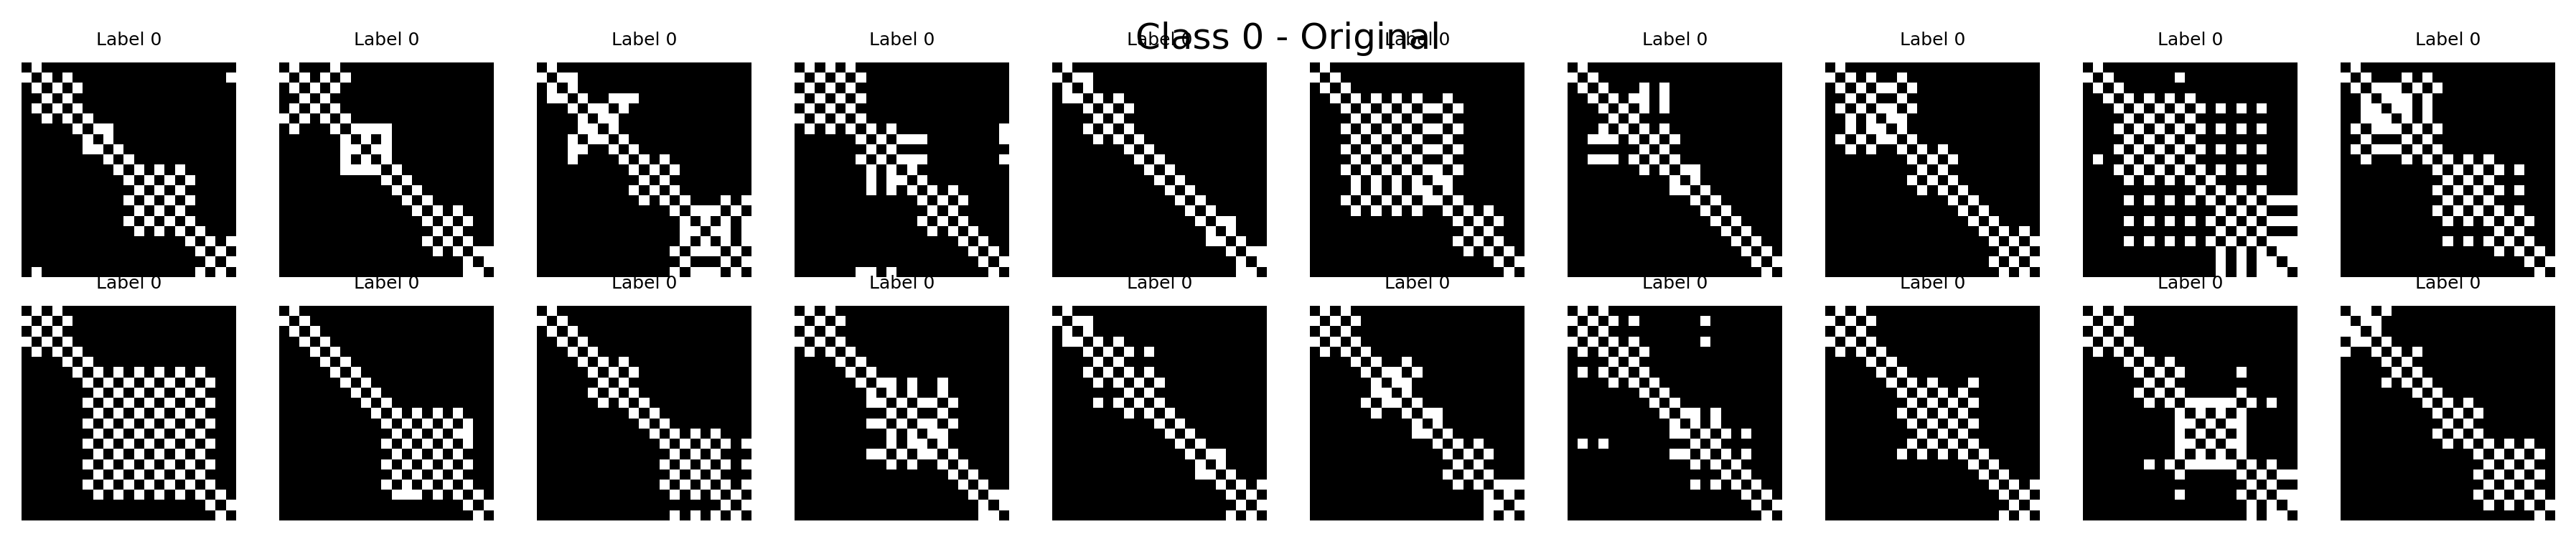

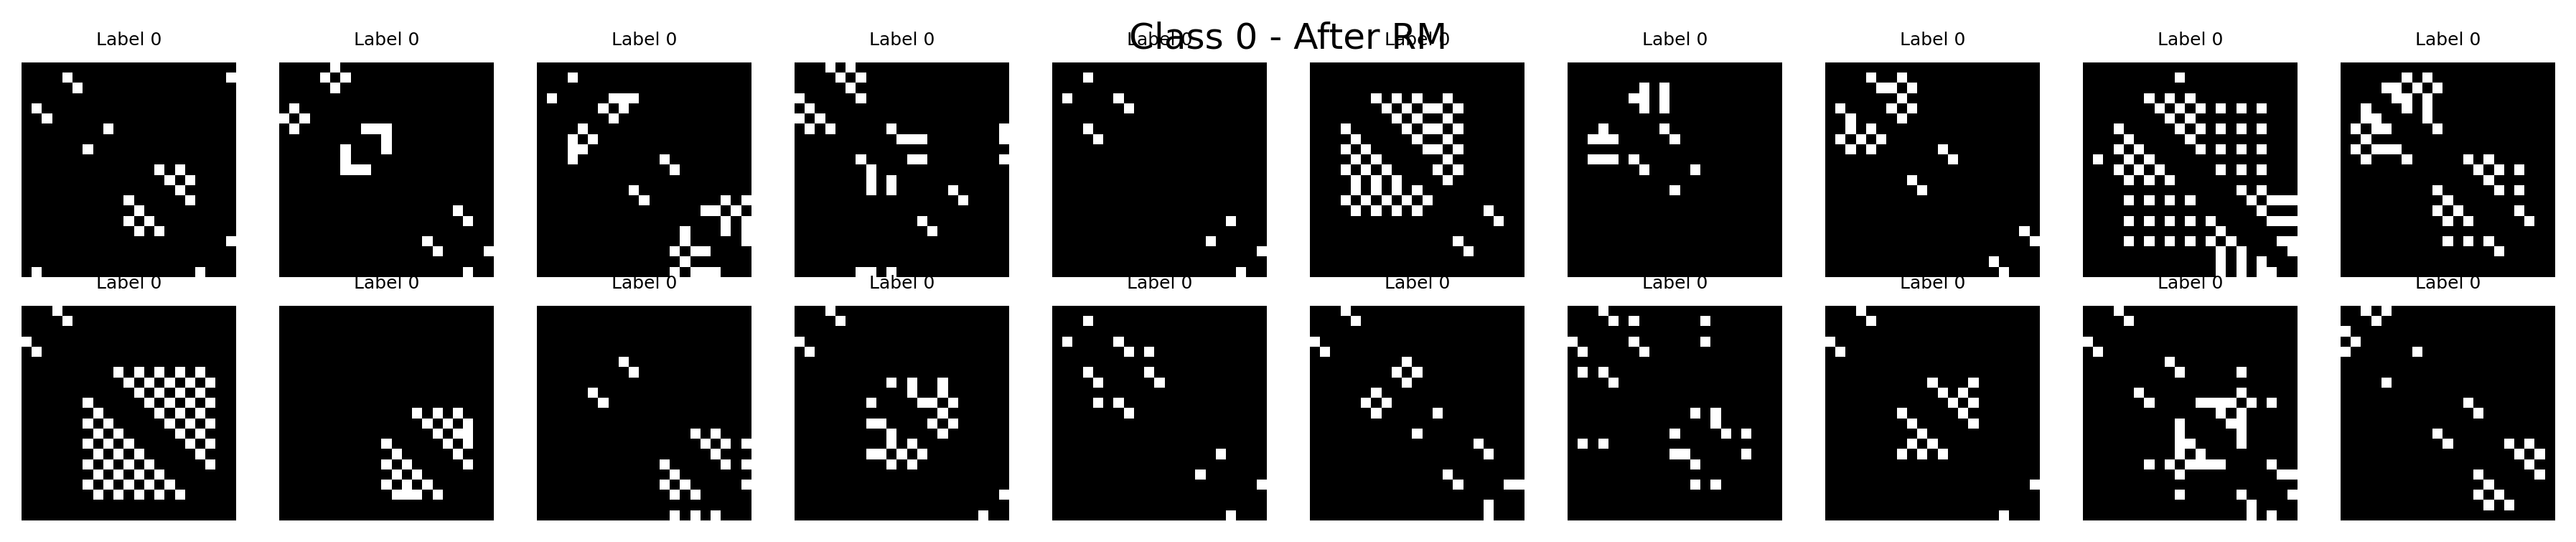

Class 1 has 20000 samples.


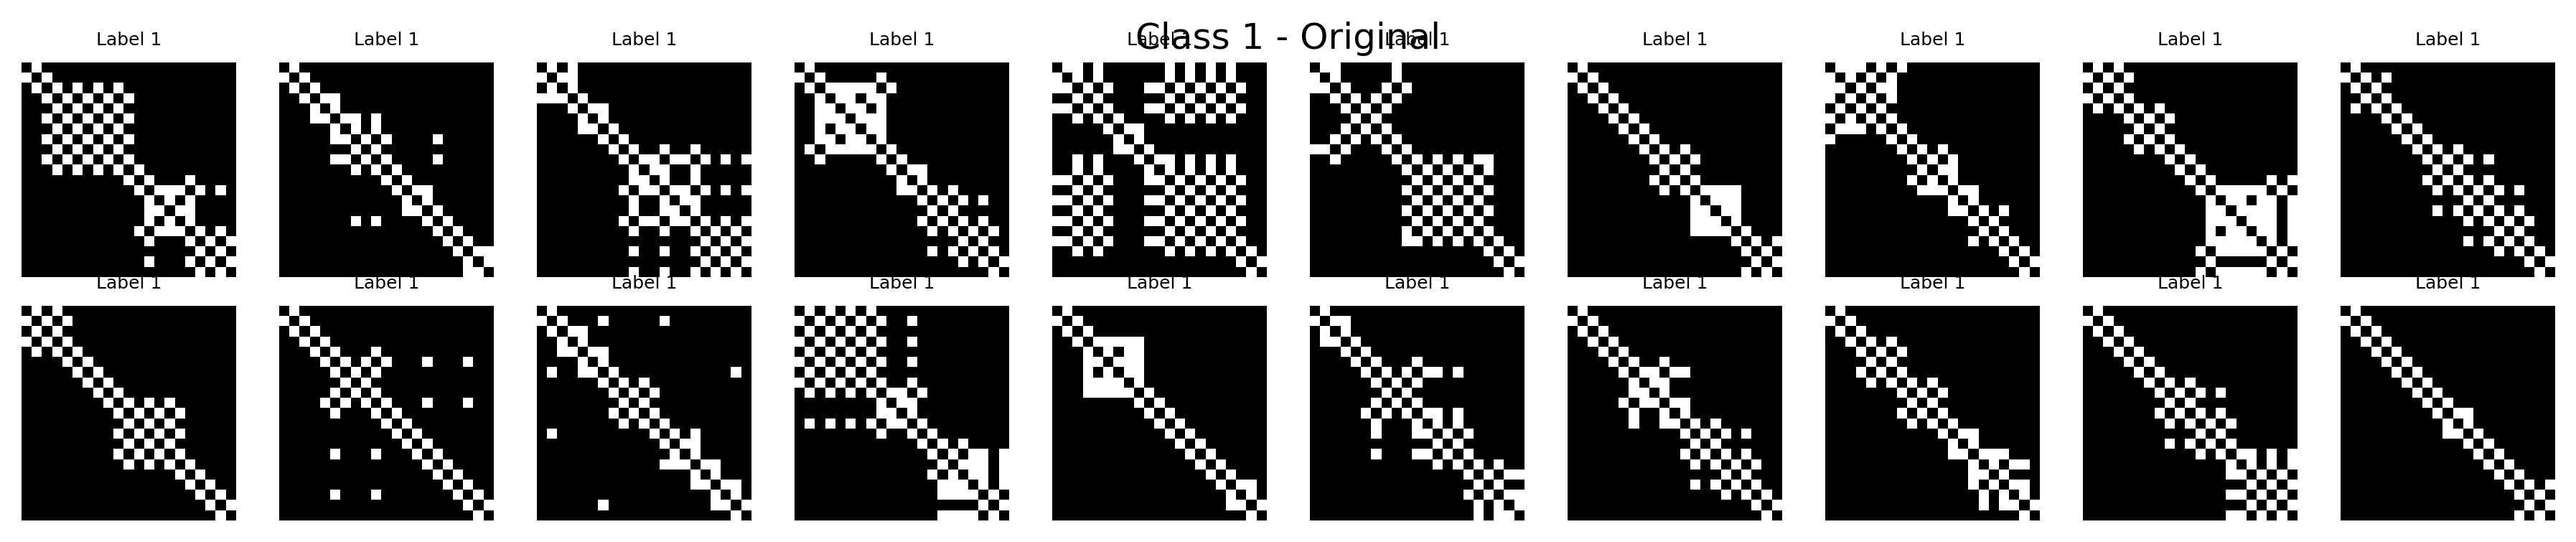

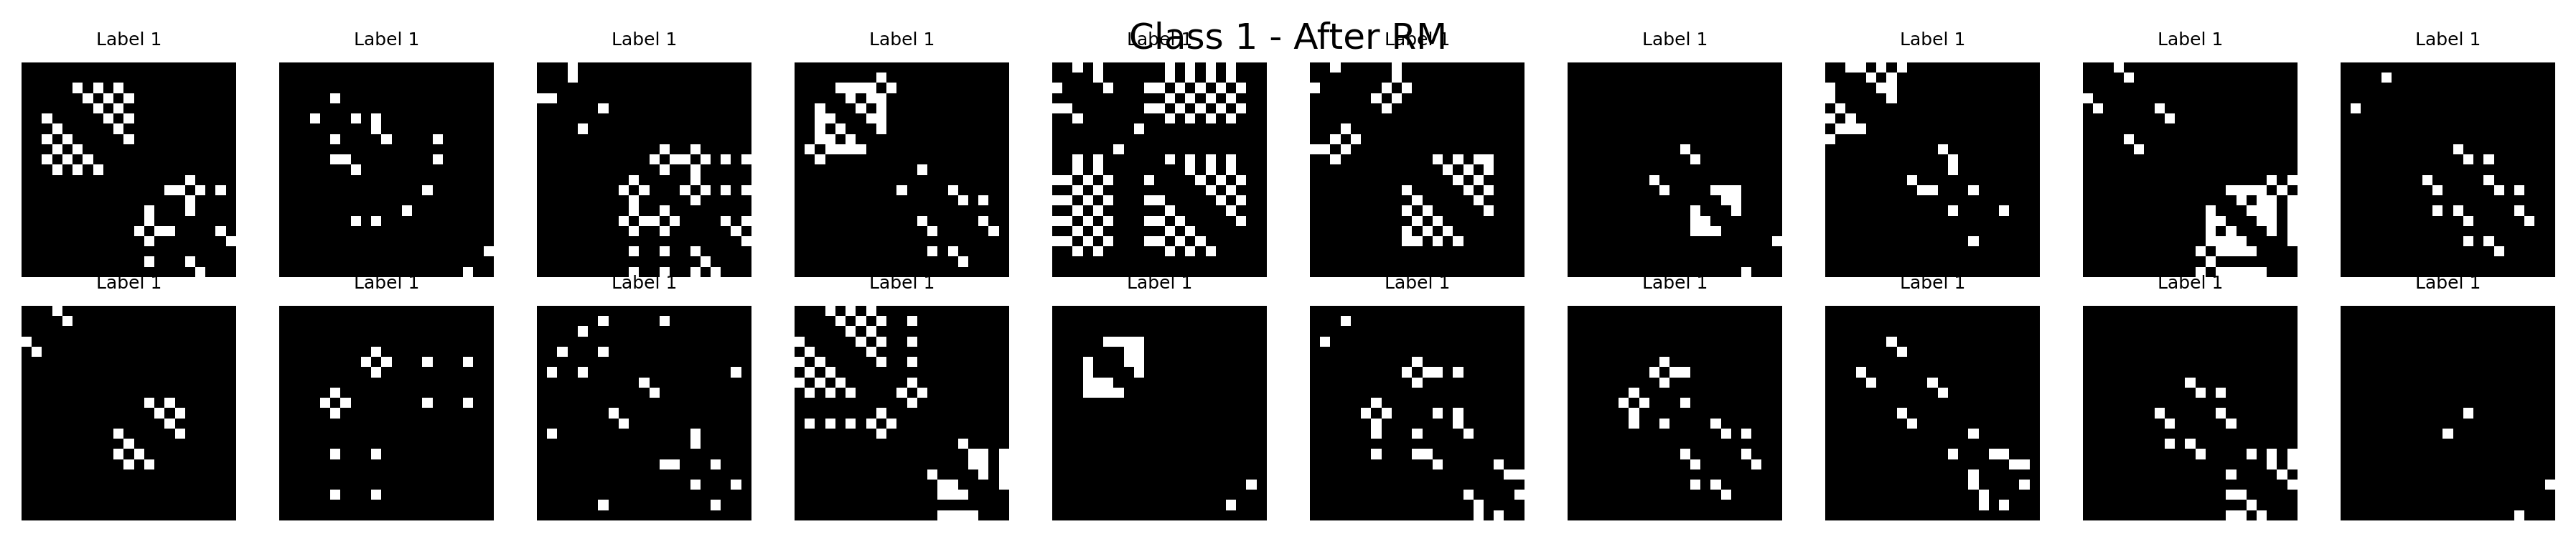

Class 2 has 20000 samples.


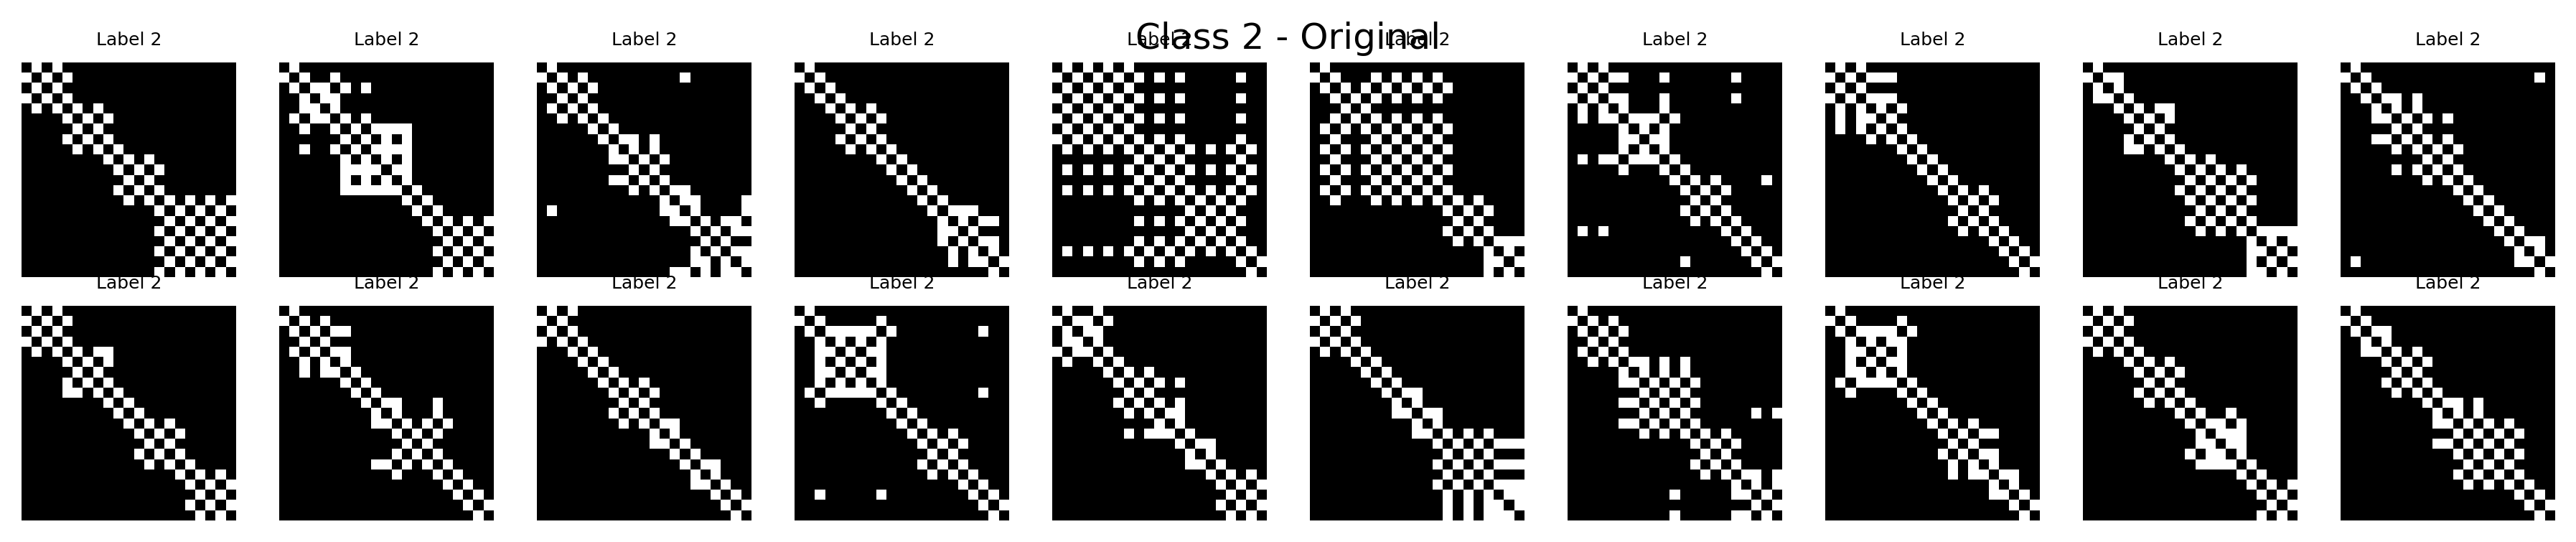

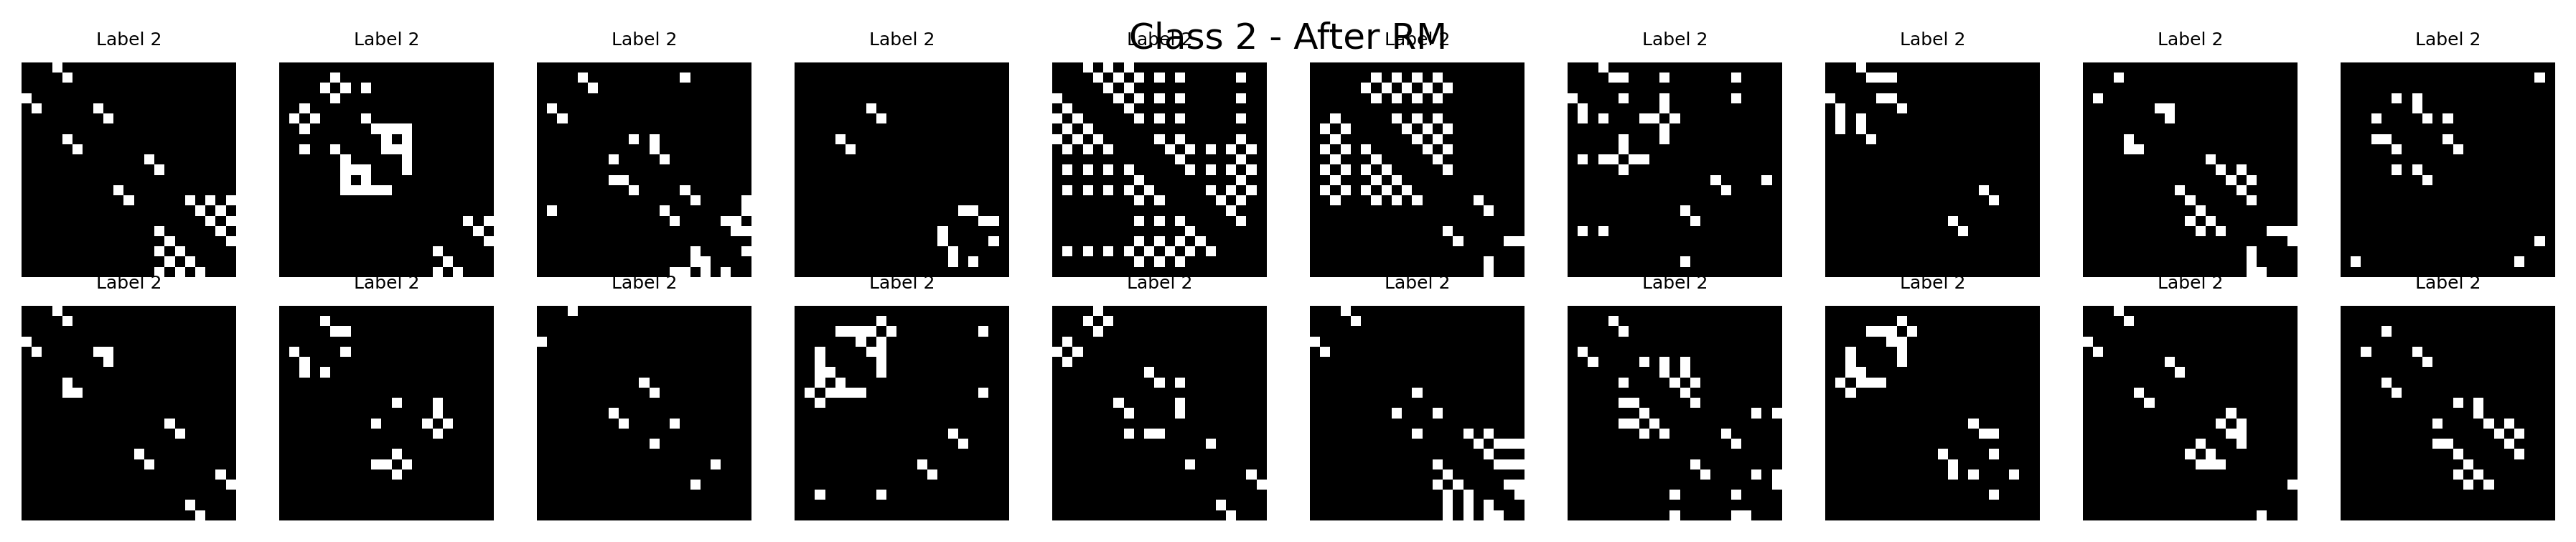

Class 3 has 20000 samples.


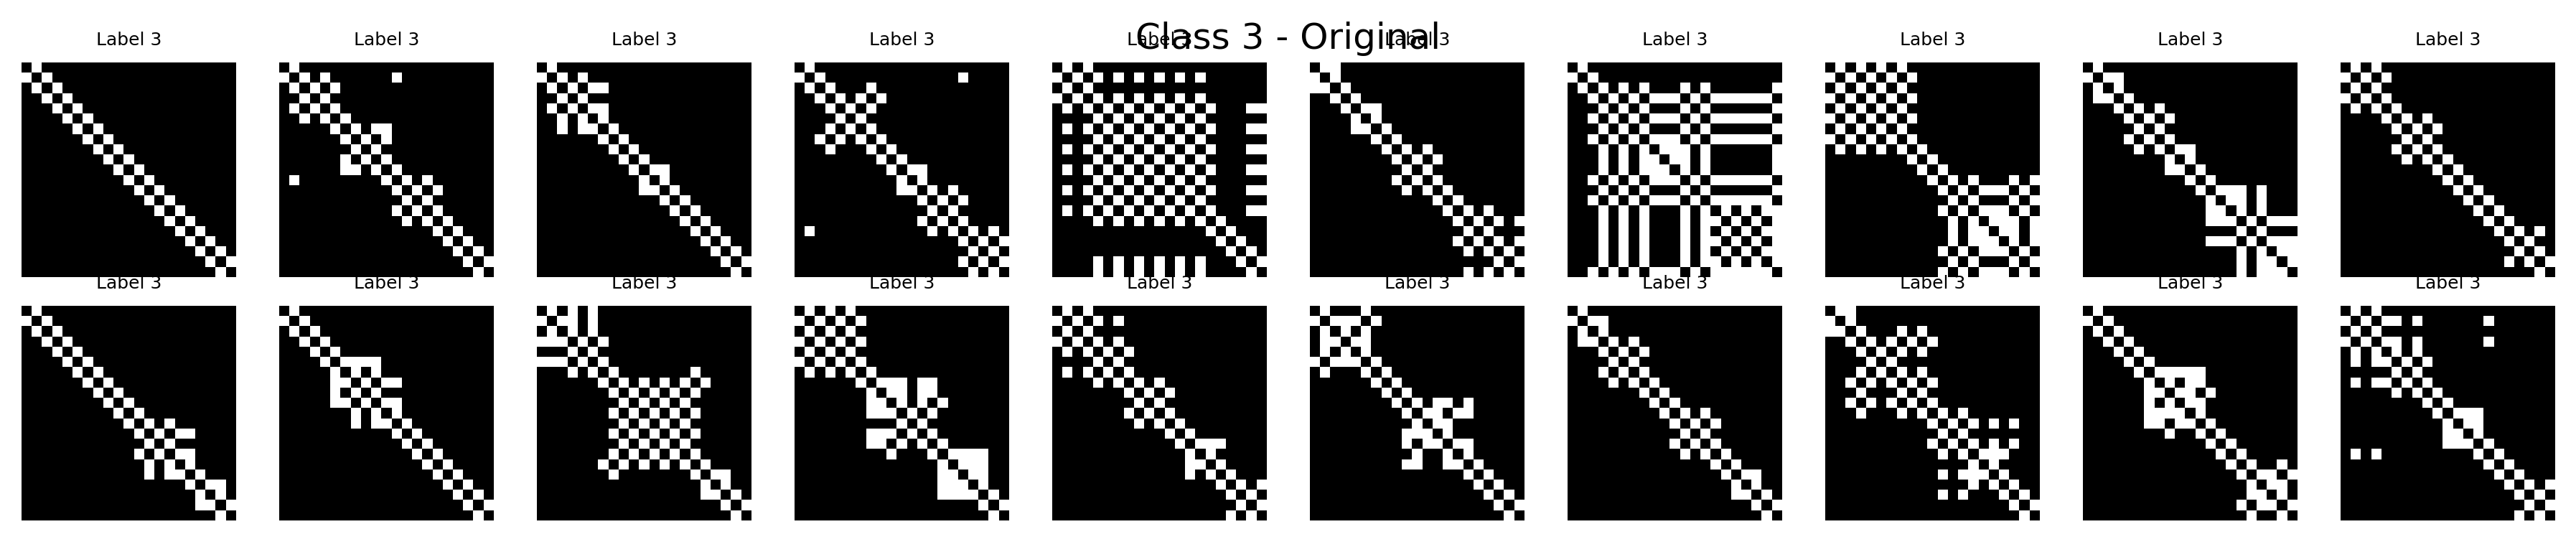

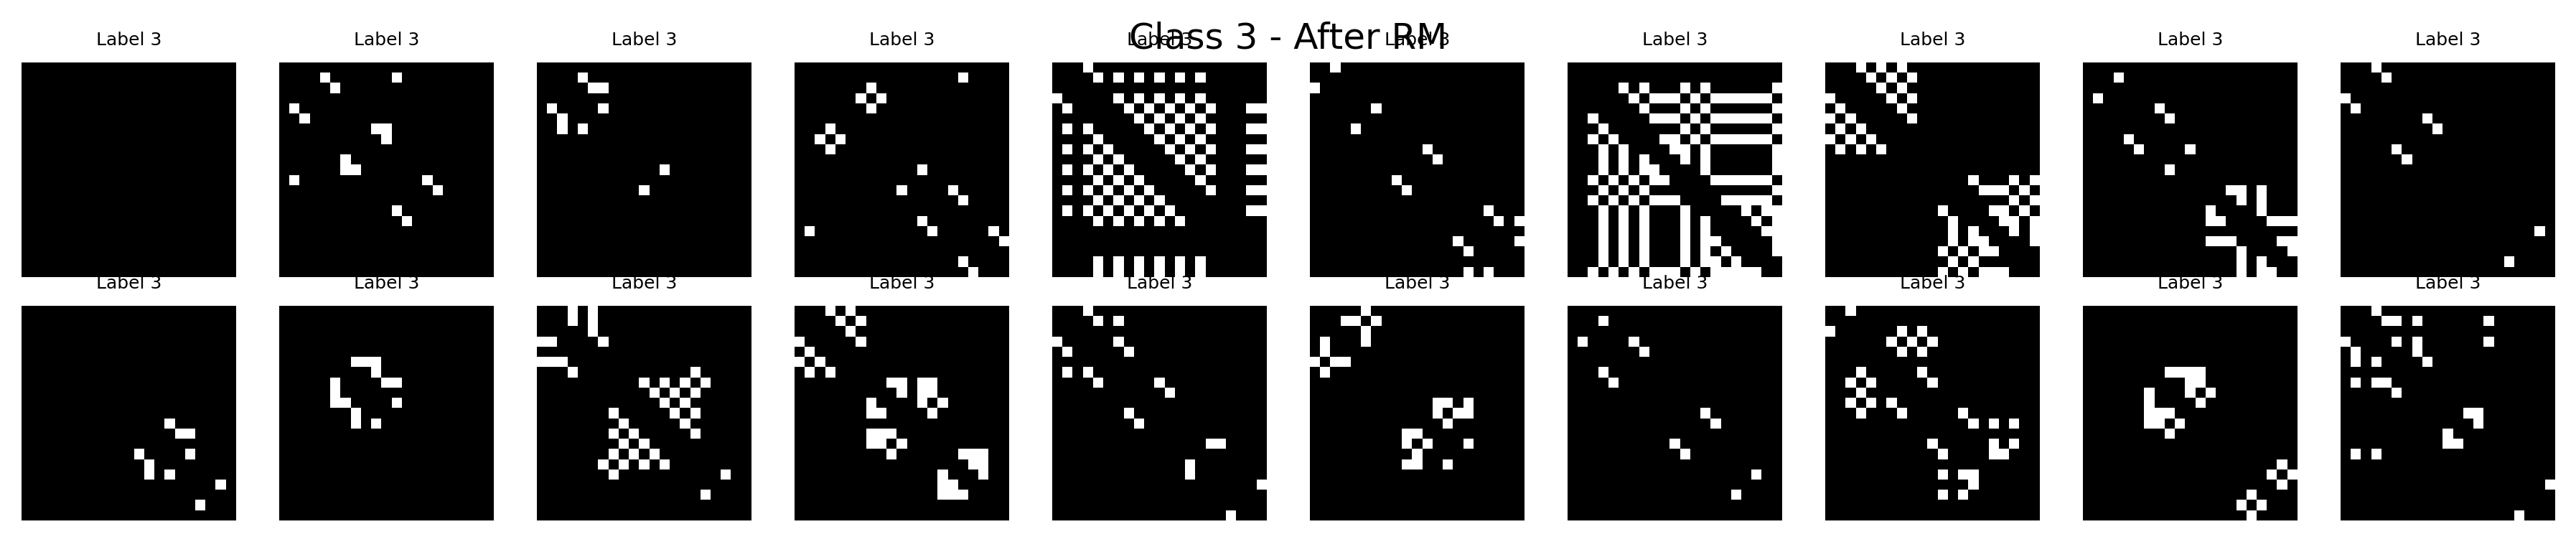

In [ ]:
#1-k after removing reference matrix
import torch
from torch_geometric.data import Data, InMemoryDataset
from torch_geometric.utils import from_scipy_sparse_matrix
import scipy.sparse as sp
import numpy as np
import matplotlib.pyplot as plt
import random

class MyCustomDataset(InMemoryDataset):
    def __init__(self, data_list, transform=None, pre_transform=None):
        self.data_list = data_list
        super(MyCustomDataset, self).__init__(None, transform, pre_transform)
        self.data, self.slices = self.collate(data_list)

    @property
    def raw_file_names(self):
        return []

    @property
    def processed_file_names(self):
        return []

    def download(self):
        pass

    def process(self):
        pass

    def len(self):
        return len(self.data_list)

    def get(self, idx):
        return self.data_list[idx]

def remove_duplicates_and_reindex(node_labels):
    unique_node_labels, unique_indices = np.unique(node_labels, return_inverse=True, axis=0)
    node_features = np.arange(1, len(unique_node_labels) + 1).reshape(-1, 1)
    return node_features, unique_indices

def create_reference_matrix(size):
    matrix = np.zeros((size, size))
    for i in range(size):
        if i > 0:
            matrix[i, i-1] = 1
        if i < size-1:
            matrix[i, i+1] = 1
    return matrix

def plot_adjacency_matrices(matrices, labels, title="Adjacency Matrices", cols=10):
    rows = (len(matrices) + cols - 1) // cols
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 1.2, rows * 1.2))
    fig.suptitle(title, fontsize=12)

    for i, (matrix, label) in enumerate(zip(matrices, labels)):
        ax = axs[i // cols, i % cols]
        ax.imshow(matrix, cmap='gray', interpolation='none')
        ax.set_title(f'Label {label}', fontsize=6)
        ax.axis('off')

    for j in range(i + 1, rows * cols):
        axs[j // cols, j % cols].axis('off')

    plt.tight_layout(pad=0.1)
    plt.subplots_adjust(top=0.9)
    plt.show()

dataset = []
counter = 0
label_number = 0

original_matrices = []
adjusted_matrices = []

for adjacency_matrix in worklist_adjacency_matrix:
    y = torch.tensor([label_number], dtype=torch.long)

    for graph in adjacency_matrix:
        if counter >= len(worklist_node_labels[label_number]):
            print(f"Counter {counter} out of range for label_number {label_number}")
            break

        sample = graph.reshape(21, 21)

        node_features, unique_indices = remove_duplicates_and_reindex(worklist_node_labels[label_number][counter])

        original_matrices.append((sample.copy(), label_number))

        reference_matrix = create_reference_matrix(sample.shape[0])
        sample_after_rm = sample - reference_matrix

        adjusted_matrices.append((sample_after_rm, label_number))

        x = torch.tensor(node_features, dtype=torch.long)
        adj_matrix = sp.coo_matrix(sample_after_rm)
        edge_index, edge_attr = from_scipy_sparse_matrix(adj_matrix)
        edge_index = torch.tensor([unique_indices[edge_index[0]], unique_indices[edge_index[1]]], dtype=torch.long)

        data = Data(x=x, edge_index=edge_index, y=y)
        dataset.append(data)

        counter += 1

    counter = 0
    label_number += 1

dataset = MyCustomDataset(dataset).shuffle()

class_indices = {label: [] for label in range(label_number)}

for idx, data in enumerate(dataset):
    class_indices[data.y.item()].append(idx)

for label in class_indices.keys():
    print(f"Class {label} has {len(class_indices[label])} samples.")
    sample_indices = random.sample(class_indices[label], min(20, len(class_indices[label])))

    original_samples = [original_matrices[idx] for idx in sample_indices]
    adjusted_samples = [adjusted_matrices[idx] for idx in sample_indices]

    original_matrices_to_plot = [mat for mat, lbl in original_samples]
    adjusted_matrices_to_plot = [mat for mat, lbl in adjusted_samples]

    plot_adjacency_matrices(original_matrices_to_plot, [label] * len(original_matrices_to_plot), title=f"Class {label} - Original")
    plot_adjacency_matrices(adjusted_matrices_to_plot, [label] * len(adjusted_matrices_to_plot), title=f"Class {label} - After RM")


In [ ]:
import torch
import torch.nn.functional as F
from torch.nn import Linear, Sequential, BatchNorm1d, Dropout
from torch_geometric.nn import GINConv
from torch_geometric.nn import global_mean_pool, global_add_pool

class Mish(torch.nn.Module):
    def forward(self, x):
        return x * torch.tanh(F.softplus(x))

class GIN(torch.nn.Module):
    """GIN"""
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(dataset.num_node_features, dim_h),
                       BatchNorm1d(dim_h), Mish(),
                       Linear(dim_h, dim_h), Mish()), train_eps=False)
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), Mish(),
                       Linear(dim_h, dim_h), Mish()), train_eps=False)
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), Mish(),
                       Linear(dim_h, dim_h), Mish()), train_eps=False)

        self.lin1 = Linear(dim_h * 3, dim_h * 3)
        self.lin2 = Linear(dim_h * 3, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        # Node embeddings
        h1 = self.conv1(x, edge_index)
        h2 = self.conv2(h1, edge_index)
        h3 = self.conv3(h2, edge_index)

        # Graph-level readout
        h1 = global_add_pool(h1, batch)
        h2 = global_add_pool(h2, batch)
        h3 = global_add_pool(h3, batch)

        # Concatenate graph embeddings
        h = torch.cat((h1, h2, h3), dim=1)

        # Classifier
        h = self.lin1(h)
        h = Mish()(h)
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.lin2(h)

        return h, F.log_softmax(h, dim=1)

gin = GIN(dim_h=32)



In [ ]:
from torch_geometric.loader import DataLoader

quick_test_dataset = dataset[:int(len(dataset)*0.1)]
remaining_dataset = dataset[int(len(dataset)*0.1):]

train_dataset = quick_test_dataset[:int(len(quick_test_dataset)*0.8)]
val_dataset   = quick_test_dataset[int(len(quick_test_dataset)*0.8):int(len(quick_test_dataset)*0.9)]
test_dataset  = quick_test_dataset[int(len(quick_test_dataset)*0.9):]

print(f'Quick test set = {len(quick_test_dataset)} graphs')
print(f'Training set   = {len(train_dataset)} graphs')
print(f'Validation set = {len(val_dataset)} graphs')
print(f'Test set       = {len(test_dataset)} graphs')

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print('\nTrain loader:')
for i, subgraph in enumerate(train_loader):
    print(f' - Subgraph {i}: {subgraph}')

print('\nValidation loader:')
for i, subgraph in enumerate(val_loader):
    print(f' - Subgraph {i}: {subgraph}')

print('\nTest loader:')
for i, subgraph in enumerate(test_loader):
    print(f' - Subgraph {i}: {subgraph}')


Quick test set = 8000 graphs
Training set   = 6400 graphs
Validation set = 800 graphs
Test set       = 800 graphs

Train loader:
 - Subgraph 0: DataBatch(x=[1080, 1], edge_index=[2, 2190], y=[64], batch=[1080], ptr=[65])
 - Subgraph 1: DataBatch(x=[1076, 1], edge_index=[2, 2368], y=[64], batch=[1076], ptr=[65])
 - Subgraph 2: DataBatch(x=[1063, 1], edge_index=[2, 2044], y=[64], batch=[1063], ptr=[65])
 - Subgraph 3: DataBatch(x=[1125, 1], edge_index=[2, 1814], y=[64], batch=[1125], ptr=[65])
 - Subgraph 4: DataBatch(x=[1098, 1], edge_index=[2, 1990], y=[64], batch=[1098], ptr=[65])
 - Subgraph 5: DataBatch(x=[1088, 1], edge_index=[2, 2020], y=[64], batch=[1088], ptr=[65])
 - Subgraph 6: DataBatch(x=[1073, 1], edge_index=[2, 2174], y=[64], batch=[1073], ptr=[65])
 - Subgraph 7: DataBatch(x=[1092, 1], edge_index=[2, 2048], y=[64], batch=[1092], ptr=[65])
 - Subgraph 8: DataBatch(x=[1095, 1], edge_index=[2, 2030], y=[64], batch=[1095], ptr=[65])
 - Subgraph 9: DataBatch(x=[1091, 1], edge_

In [ ]:
import numpy as np
from adabelief_pytorch import AdaBelief

def train(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = AdaBelief(model.parameters(), lr=0.001, weight_decay=0.01, print_change_log=False)
    epochs = 20

    all_train_outputs = []
    all_train_labels = []

    model.train()
    for epoch in range(epochs + 1):
        total_loss = 0
        acc = 0

        # Train on batches
        for data in loader:
            optimizer.zero_grad()
            h, out = model(data.x, data.edge_index, data.batch)
            loss = criterion(out, data.y)
            total_loss += loss / len(loader)
            acc += accuracy(out.argmax(dim=1), data.y) / len(loader)
            loss.backward()
            optimizer.step()

            all_train_outputs.append(h.detach().cpu().numpy())
            all_train_labels.append(data.y.detach().cpu().numpy())

        # Validation
        val_loss, val_acc, all_val_outputs, all_val_labels = test_and_save_outputs(model, val_loader)

        print(f'Epoch {epoch:>0} | Train Loss: {total_loss:.2f} '
              f'| Train Acc: {acc*100:>5.2f}% '
              f'| Val Loss: {val_loss:.2f} '
              f'| Val Acc: {val_acc*100:.2f}%')

    all_train_outputs = np.concatenate(all_train_outputs, axis=0)
    all_train_labels = np.concatenate(all_train_labels, axis=0)
    np.save('all_train_outputs.npy', all_train_outputs)
    np.save('all_train_labels.npy', all_train_labels)
    np.save('all_val_outputs.npy', all_val_outputs)
    np.save('all_val_labels.npy', all_val_labels)

    test_loss, test_acc, all_test_outputs, all_test_labels = test_and_save_outputs(model, test_loader)
    np.save('all_test_outputs.npy', all_test_outputs)
    np.save('all_test_labels.npy', all_test_labels)

    print(f'Test Loss: {test_loss:.2f} | Test Acc: {test_acc*100:.2f}%')

    return model

@torch.no_grad()
def test_and_save_outputs(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    model.eval()
    loss = 0
    acc = 0

    all_outputs = []
    all_labels = []

    for data in loader:
        h, out = model(data.x, data.edge_index, data.batch)
        loss += criterion(out, data.y) / len(loader)
        acc += accuracy(out.argmax(dim=1), data.y) / len(loader)

        all_outputs.append(h.detach().cpu().numpy())
        all_labels.append(data.y.detach().cpu().numpy())

    all_outputs = np.concatenate(all_outputs, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    return loss, acc, all_outputs, all_labels

def accuracy(pred_y, y):
    """Calculate accuracy."""
    return ((pred_y == y).sum() / len(y)).item()

gin = train(gin, train_loader)



Weight decoupling enabled in AdaBelief
Rectification enabled in AdaBelief
Epoch 0 | Train Loss: 2.19 | Train Acc: 26.16% | Val Loss: 1.51 | Val Acc: 28.37%
Epoch 1 | Train Loss: 1.39 | Train Acc: 30.86% | Val Loss: 1.46 | Val Acc: 28.49%
Epoch 2 | Train Loss: 1.37 | Train Acc: 31.80% | Val Loss: 1.47 | Val Acc: 29.45%
Epoch 3 | Train Loss: 1.36 | Train Acc: 32.23% | Val Loss: 1.47 | Val Acc: 30.17%
Epoch 4 | Train Loss: 1.35 | Train Acc: 33.36% | Val Loss: 1.46 | Val Acc: 30.65%
Epoch 5 | Train Loss: 1.34 | Train Acc: 33.09% | Val Loss: 1.53 | Val Acc: 29.93%
Epoch 6 | Train Loss: 1.34 | Train Acc: 33.98% | Val Loss: 1.44 | Val Acc: 30.77%
Epoch 7 | Train Loss: 1.33 | Train Acc: 34.20% | Val Loss: 1.46 | Val Acc: 28.97%
Epoch 8 | Train Loss: 1.33 | Train Acc: 35.17% | Val Loss: 1.46 | Val Acc: 30.41%
Epoch 9 | Train Loss: 1.33 | Train Acc: 34.25% | Val Loss: 1.47 | Val Acc: 30.17%
Epoch 10 | Train Loss: 1.32 | Train Acc: 33.89% | Val Loss: 1.44 | Val Acc: 31.61%
Epoch 11 | Train Loss: 

# GIN using normalized VID

In [ ]:
import torch
import torch.nn.functional as F
from torch.nn import Linear, Sequential, BatchNorm1d, Dropout
from torch_geometric.nn import GINConv
from torch_geometric.nn import global_mean_pool, global_add_pool

class Mish(torch.nn.Module):
    def forward(self, x):
        return x * torch.tanh(F.softplus(x))

class GIN(torch.nn.Module):
    """GIN"""
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(dataset.num_node_features, dim_h),
                       BatchNorm1d(dim_h), Mish(),
                       Linear(dim_h, dim_h), Mish()), train_eps=False)
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), Mish(),
                       Linear(dim_h, dim_h), Mish()), train_eps=False)
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), Mish(),
                       Linear(dim_h, dim_h), Mish()), train_eps=False)

        self.lin1 = Linear(dim_h * 3, dim_h * 3)
        self.lin2 = Linear(dim_h * 3, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        # Node embeddings
        h1 = self.conv1(x, edge_index)
        h2 = self.conv2(h1, edge_index)
        h3 = self.conv3(h2, edge_index)
        # Graph-level readout
        h1 = global_add_pool(h1, batch)
        h2 = global_add_pool(h2, batch)
        h3 = global_add_pool(h3, batch)

        # Concatenate graph embeddings
        h = torch.cat((h1, h2, h3), dim=1)

        # Classifier
        h = self.lin1(h)
        h = Mish()(h)
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.lin2(h)

        return h, F.log_softmax(h, dim=1)

gin = GIN(dim_h=32)



In [ ]:
import numpy as np

worklist_node_labels = []
worklist_adjacency_matrix = []


worklist_node_labels.extend([node_labels_chr2L, node_labels_chr2R, node_labels_chr3L, node_labels_chr3R])
worklist_adjacency_matrix.extend([adjacency_matrix_chr2L, adjacency_matrix_chr2R, adjacency_matrix_chr3L, adjacency_matrix_chr3R])


print(worklist_adjacency_matrix)

for i in range(len(worklist_adjacency_matrix)):
    worklist_adjacency_matrix[i] = np.delete(worklist_adjacency_matrix[i], -1, axis=1)

print(worklist_adjacency_matrix)

[array([[ 0.,  1.,  1., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.]]), array([[ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  1., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  1., ...,  1.,  0., -1.]]), array([[ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.]]), array([[ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0.

In [ ]:
import torch
from torch_geometric.data import Data, InMemoryDataset
from torch_geometric.utils import from_scipy_sparse_matrix
import scipy.sparse as sp
import numpy as np

distance_list = [23.51, 25.29, 28.11, 32.08]

class MyCustomDataset(InMemoryDataset):
    def __init__(self, data_list, transform=None, pre_transform=None):
        self.data_list = data_list
        super(MyCustomDataset, self).__init__(None, transform, pre_transform)
        self.data, self.slices = self.collate(data_list)

    @property
    def raw_file_names(self):
        return []

    @property
    def processed_file_names(self):
        return []

    def download(self):
        pass

    def process(self):
        pass

    def len(self):
        return len(self.data_list)

    def get(self, idx):
        return self.data_list[idx]

def normalize_vids(node_labels, distance):
    normalized_vids = node_labels / distance
    return normalized_vids

def create_reference_matrix(size):
    matrix = np.zeros((size, size))
    for i in range(size):
        if i > 0:
            matrix[i, i-1] = 1
        if i < size-1:
            matrix[i, i+1] = 1
    return matrix

dataset = []
counter = 0
label_number = 0

for adjacency_matrix in worklist_adjacency_matrix:
    y = torch.tensor([label_number], dtype=torch.long)

    for graph in adjacency_matrix:
        if counter >= len(worklist_node_labels[label_number]):
            print(f"Counter {counter} out of range for label_number {label_number}")
            break

        sample = graph.reshape(21, 21)

        normalized_vids = normalize_vids(worklist_node_labels[label_number][counter], distance_list[label_number])

        reference_matrix = create_reference_matrix(sample.shape[0])
        sample_after_rm = sample - reference_matrix

        x = torch.tensor(normalized_vids, dtype=torch.float).view(-1, 1)
        adj_matrix = sp.coo_matrix(sample_after_rm)
        edge_index, edge_attr = from_scipy_sparse_matrix(adj_matrix)
        edge_index = torch.tensor(edge_index, dtype=torch.long)

        data = Data(x=x, edge_index=edge_index, y=y)
        dataset.append(data)

        counter += 1

    counter = 0
    label_number += 1

dataset = MyCustomDataset(dataset).shuffle()

print(dataset[20000])
print("Number of Nodes (x):")
print(dataset[0].x)
print("Edge index:")
print(dataset[0].edge_index)
print("Labels (y):")
print(len(dataset))


<ipython-input-6-63b7ca2eff7c>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index = torch.tensor(edge_index, dtype=torch.long)
Processing...
Done!


Data(x=[21, 1], edge_index=[2, 20], y=[1])
Number of Nodes (x):
tensor([[ 478.3666],
        [1699.6260],
        [ 373.8155],
        [ 552.9614],
        [1594.7631],
        [1181.1721],
        [1686.4713],
        [ 529.0836],
        [ 510.5673],
        [ 516.0225],
        [1375.5299],
        [ 857.3254],
        [1375.5299],
        [ 658.6970],
        [ 515.7731],
        [1363.4039],
        [ 488.8404],
        [ 703.9901],
        [ 515.7731],
        [ 516.0225],
        [1193.3915]])
Edge index:
tensor([[ 7,  7,  8,  9,  9,  9,  9,  9, 10, 10, 11, 12, 12, 13, 13, 13, 14, 14,
         14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20],
        [ 9, 19, 19,  7, 12, 14, 18, 20, 13, 19, 13,  9, 19, 10, 11, 18,  9, 16,
         17, 19, 17, 18, 14, 18, 14, 15,  9, 13, 15, 16,  7,  8, 10, 12, 14,  9]])
Labels (y):
80000


In [ ]:
from torch_geometric.loader import DataLoader

quick_test_dataset = dataset[:int(len(dataset)*0.1)]
remaining_dataset = dataset[int(len(dataset)*0.1):]

train_dataset = quick_test_dataset[:int(len(quick_test_dataset)*0.8)]
val_dataset   = quick_test_dataset[int(len(quick_test_dataset)*0.8):int(len(quick_test_dataset)*0.9)]
test_dataset  = quick_test_dataset[int(len(quick_test_dataset)*0.9):]

print(f'Quick test set = {len(quick_test_dataset)} graphs')
print(f'Training set   = {len(train_dataset)} graphs')
print(f'Validation set = {len(val_dataset)} graphs')
print(f'Test set       = {len(test_dataset)} graphs')

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print('\nTrain loader:')
for i, subgraph in enumerate(train_loader):
    print(f' - Subgraph {i}: {subgraph}')

print('\nValidation loader:')
for i, subgraph in enumerate(val_loader):
    print(f' - Subgraph {i}: {subgraph}')

print('\nTest loader:')
for i, subgraph in enumerate(test_loader):
    print(f' - Subgraph {i}: {subgraph}')


Quick test set = 8000 graphs
Training set   = 6400 graphs
Validation set = 800 graphs
Test set       = 800 graphs

Train loader:
 - Subgraph 0: DataBatch(x=[1344, 1], edge_index=[2, 1938], y=[64], batch=[1344], ptr=[65])
 - Subgraph 1: DataBatch(x=[1344, 1], edge_index=[2, 2114], y=[64], batch=[1344], ptr=[65])
 - Subgraph 2: DataBatch(x=[1344, 1], edge_index=[2, 2102], y=[64], batch=[1344], ptr=[65])
 - Subgraph 3: DataBatch(x=[1344, 1], edge_index=[2, 2368], y=[64], batch=[1344], ptr=[65])
 - Subgraph 4: DataBatch(x=[1344, 1], edge_index=[2, 1712], y=[64], batch=[1344], ptr=[65])
 - Subgraph 5: DataBatch(x=[1344, 1], edge_index=[2, 1970], y=[64], batch=[1344], ptr=[65])
 - Subgraph 6: DataBatch(x=[1344, 1], edge_index=[2, 2310], y=[64], batch=[1344], ptr=[65])
 - Subgraph 7: DataBatch(x=[1344, 1], edge_index=[2, 2412], y=[64], batch=[1344], ptr=[65])
 - Subgraph 8: DataBatch(x=[1344, 1], edge_index=[2, 2108], y=[64], batch=[1344], ptr=[65])
 - Subgraph 9: DataBatch(x=[1344, 1], edge_

In [ ]:
!pip install adabelief-pytorch


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import numpy as np
from adabelief_pytorch import AdaBelief

def train(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = AdaBelief(model.parameters(), lr=0.001, weight_decay=0.01, print_change_log=False)
    epochs = 99

    all_train_outputs = []
    all_train_labels = []

    model.train()
    for epoch in range(epochs + 1):
        total_loss = 0
        acc = 0

        # Train on batches
        for data in loader:
            optimizer.zero_grad()
            h, out = model(data.x, data.edge_index, data.batch)
            loss = criterion(out, data.y)
            total_loss += loss / len(loader)
            acc += accuracy(out.argmax(dim=1), data.y) / len(loader)
            loss.backward()
            optimizer.step()

            all_train_outputs.append(h.detach().cpu().numpy())
            all_train_labels.append(data.y.detach().cpu().numpy())

        # Validation
        val_loss, val_acc, all_val_outputs, all_val_labels = test_and_save_outputs(model, val_loader)

        print(f'Epoch {epoch:>0} | Train Loss: {total_loss:.2f} '
              f'| Train Acc: {acc*100:>5.2f}% '
              f'| Val Loss: {val_loss:.2f} '
              f'| Val Acc: {val_acc*100:.2f}%')

    all_train_outputs = np.concatenate(all_train_outputs, axis=0)
    all_train_labels = np.concatenate(all_train_labels, axis=0)
    np.save('all_train_outputs.npy', all_train_outputs)
    np.save('all_train_labels.npy', all_train_labels)
    np.save('all_val_outputs.npy', all_val_outputs)
    np.save('all_val_labels.npy', all_val_labels)

    test_loss, test_acc, all_test_outputs, all_test_labels = test_and_save_outputs(model, test_loader)
    np.save('all_test_outputs.npy', all_test_outputs)
    np.save('all_test_labels.npy', all_test_labels)

    print(f'Test Loss: {test_loss:.2f} | Test Acc: {test_acc*100:.2f}%')

    return model

@torch.no_grad()
def test_and_save_outputs(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    model.eval()
    loss = 0
    acc = 0

    all_outputs = []
    all_labels = []

    for data in loader:
        h, out = model(data.x, data.edge_index, data.batch)
        loss += criterion(out, data.y) / len(loader)
        acc += accuracy(out.argmax(dim=1), data.y) / len(loader)

        all_outputs.append(h.detach().cpu().numpy())
        all_labels.append(data.y.detach().cpu().numpy())

    all_outputs = np.concatenate(all_outputs, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    return loss, acc, all_outputs, all_labels

def accuracy(pred_y, y):
    """Calculate accuracy."""
    return ((pred_y == y).sum() / len(y)).item()

gin = train(gin, train_loader)



Weight decoupling enabled in AdaBelief
Rectification enabled in AdaBelief
Epoch 0 | Train Loss: 1.51 | Train Acc: 30.59% | Val Loss: 1.29 | Val Acc: 41.59%
Epoch 1 | Train Loss: 1.29 | Train Acc: 39.09% | Val Loss: 1.27 | Val Acc: 40.99%
Epoch 2 | Train Loss: 1.28 | Train Acc: 38.98% | Val Loss: 1.32 | Val Acc: 39.54%
Epoch 3 | Train Loss: 1.27 | Train Acc: 40.20% | Val Loss: 1.24 | Val Acc: 40.38%
Epoch 4 | Train Loss: 1.25 | Train Acc: 41.23% | Val Loss: 1.23 | Val Acc: 42.19%
Epoch 5 | Train Loss: 1.25 | Train Acc: 41.52% | Val Loss: 1.23 | Val Acc: 43.87%
Epoch 6 | Train Loss: 1.24 | Train Acc: 41.75% | Val Loss: 1.23 | Val Acc: 43.03%
Epoch 7 | Train Loss: 1.23 | Train Acc: 42.23% | Val Loss: 1.20 | Val Acc: 45.43%
Epoch 8 | Train Loss: 1.23 | Train Acc: 42.37% | Val Loss: 1.23 | Val Acc: 41.83%
Epoch 9 | Train Loss: 1.23 | Train Acc: 42.31% | Val Loss: 1.23 | Val Acc: 42.31%
Epoch 10 | Train Loss: 1.22 | Train Acc: 43.64% | Val Loss: 1.21 | Val Acc: 43.15%
Epoch 11 | Train Loss: 

In [ ]:
import numpy as np
import os
print("Current working directory:", os.getcwd())


train_outputs = np.load('/content/all_train_outputs.npy', allow_pickle=True)
train_labels = np.load('all_train_labels.npy', allow_pickle=True)

val_outputs = np.load('all_val_outputs.npy', allow_pickle=True)
val_labels = np.load('all_val_labels.npy', allow_pickle=True)

test_outputs = np.load('all_test_outputs.npy', allow_pickle=True)
test_labels = np.load('all_test_labels.npy', allow_pickle=True)

print(f'Train outputs shape: {train_outputs.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Validation outputs shape: {val_outputs.shape}')
print(f'Validation labels shape: {val_labels.shape}')
print(f'Test outputs shape: {test_outputs.shape}')
print(f'Test labels shape: {test_labels.shape}')


Current working directory: /content
Train outputs shape: (390400, 4)
Train labels shape: (390400,)
Validation outputs shape: (800, 4)
Validation labels shape: (800,)
Test outputs shape: (800, 4)
Test labels shape: (800,)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

def plot_tsne(train_outputs, train_labels, title_suffix):
    sample_size = int(0.2 * len(train_outputs))
    indices = np.random.choice(len(train_outputs), sample_size, replace=False)
    train_outputs_sampled = train_outputs[indices]
    train_labels_sampled = train_labels[indices]

    sample_size = len(train_outputs_sampled)
    perplexity = 100

    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=300, verbose=1)
    tsne_results = tsne.fit_transform(train_outputs_sampled)

    df_subset = pd.DataFrame()
    df_subset['tsne-one'] = tsne_results[:, 0]
    df_subset['tsne-two'] = tsne_results[:, 1]
    df_subset['label'] = train_labels_sampled

    plt.figure(figsize=(16, 10))
    sns.scatterplot(
        x='tsne-one', y='tsne-two',
        hue='label',
        palette=sns.color_palette("hsv", len(np.unique(train_labels_sampled))),
        data=df_subset,
        legend="full",
        alpha=0.7
    )
    plt.title(f'2D t-SNE of Train Data (perplexity={perplexity}) - {title_suffix}')
    plt.show()

# 0 vs 1
mask_0vs1 = np.isin(train_labels, [0, 1])
plot_tsne(train_outputs[mask_0vs1], train_labels[mask_0vs1], '0vs1')

# 2 vs 3
mask_2vs3 = np.isin(train_labels, [2, 3])
plot_tsne(train_outputs[mask_2vs3], train_labels[mask_2vs3], '2vs3')

# 0 vs 1 vs 2 vs 3
mask_0vs1vs2vs3 = np.isin(train_labels, [0, 1, 2, 3])
plot_tsne(train_outputs[mask_0vs1vs2vs3], train_labels[mask_0vs1vs2vs3], '0vs1vs2vs3')




Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

train_outputs = np.load('all_train_outputs.npy')
train_labels = np.load('all_train_labels.npy')


def plot_tsne_3d(train_outputs, train_labels, title_suffix):
    sample_size = int(0.2 * len(train_outputs))
    indices = np.random.choice(len(train_outputs), sample_size, replace=False)
    train_outputs_sampled = train_outputs[indices]
    train_labels_sampled = train_labels[indices]

    sample_size = len(train_outputs_sampled)

    perplexity = 100

    tsne = TSNE(n_components=3, perplexity=100, n_iter=300, verbose=1)
    tsne_results = tsne.fit_transform(train_outputs_sampled)

    df_subset = pd.DataFrame()
    df_subset['tsne-one'] = tsne_results[:, 0]
    df_subset['tsne-two'] = tsne_results[:, 1]
    df_subset['tsne-three'] = tsne_results[:, 2]
    df_subset['label'] = train_labels_sampled

    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(111, projection='3d')

    unique_labels = np.unique(df_subset['label'])
    palette = sns.color_palette("hsv", len(unique_labels))
    color_map = {label: palette[i] for i, label in enumerate(unique_labels)}

    colors = df_subset['label'].map(color_map)

    scatter = ax.scatter(
        df_subset['tsne-one'],
        df_subset['tsne-two'],
        df_subset['tsne-three'],
        c=colors,
        alpha=0.7
    )

    handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
    legend1 = ax.legend(handles, unique_labels, title="Classes")
    ax.add_artist(legend1)

    ax.set_xlabel('TSNE Component 1')
    ax.set_ylabel('TSNE Component 2')
    ax.set_zlabel('TSNE Component 3')
    plt.title(f'3D t-SNE of Train Data (perplexity={perplexity}) - {title_suffix}')
    plt.show()

# 0 vs 1
mask_0vs1 = np.isin(train_labels, [0, 1])
plot_tsne_3d(train_outputs[mask_0vs1], train_labels[mask_0vs1], '0vs1')

# 2 vs 3
mask_2vs3 = np.isin(train_labels, [2, 3])
plot_tsne_3d(train_outputs[mask_2vs3], train_labels[mask_2vs3], '2vs3')

# 0 vs 1 vs 2 vs 3
mask_0vs1vs2vs3 = np.isin(train_labels, [0, 1, 2, 3])
plot_tsne_3d(train_outputs[mask_0vs1vs2vs3], train_labels[mask_0vs1vs2vs3], '0vs1vs2vs3')


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from mpl_toolkits.mplot3d import Axes3D

def plot_umap_2d(train_outputs, train_labels, title_suffix):
    sample_size = int(1 * len(train_outputs))
    indices = np.random.choice(len(train_outputs), sample_size, replace=False)
    train_outputs_sampled = train_outputs[indices]
    train_labels_sampled = train_labels[indices]

    reducer = umap.UMAP(n_components=2, random_state=42)
    umap_results = reducer.fit_transform(train_outputs_sampled)

    df_subset = pd.DataFrame()
    df_subset['umap-one'] = umap_results[:, 0]
    df_subset['umap-two'] = umap_results[:, 1]
    df_subset['label'] = train_labels_sampled

    plt.figure(figsize=(16, 10))
    sns.scatterplot(
        x='umap-one', y='umap-two',
        hue='label',
        palette=sns.color_palette("hsv", len(np.unique(train_labels_sampled))),
        data=df_subset,
        legend="full",
        alpha=0.7
    )
    plt.title(f'2D UMAP of Train Data - {title_suffix}')
    plt.show()

def plot_umap_3d(train_outputs, train_labels, title_suffix):
    sample_size = int(0.1 * len(train_outputs))
    indices = np.random.choice(len(train_outputs), sample_size, replace=False)
    train_outputs_sampled = train_outputs[indices]
    train_labels_sampled = train_labels[indices]

    reducer = umap.UMAP(n_components=3, random_state=42)
    umap_results = reducer.fit_transform(train_outputs_sampled)

    df_subset = pd.DataFrame()
    df_subset['umap-one'] = umap_results[:, 0]
    df_subset['umap-two'] = umap_results[:, 1]
    df_subset['umap-three'] = umap_results[:, 2]
    df_subset['label'] = train_labels_sampled

    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(111, projection='3d')

    unique_labels = np.unique(df_subset['label'])
    palette = sns.color_palette("hsv", len(unique_labels))
    color_map = {label: palette[i] for i, label in enumerate(unique_labels)}

    colors = df_subset['label'].map(color_map)

    scatter = ax.scatter(
        df_subset['umap-one'],
        df_subset['umap-two'],
        df_subset['umap-three'],
        c=colors,
        alpha=0.7
    )

    handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
    legend1 = ax.legend(handles, unique_labels, title="Classes")
    ax.add_artist(legend1)

    ax.set_xlabel('UMAP Component 1')
    ax.set_ylabel('UMAP Component 2')
    ax.set_zlabel('UMAP Component 3')
    plt.title(f'3D UMAP of Train Data - {title_suffix}')
    plt.show()

# 0 vs 1
mask_0vs1 = np.isin(train_labels, [0, 1])
plot_umap_2d(train_outputs[mask_0vs1], train_labels[mask_0vs1], '0vs1')
plot_umap_3d(train_outputs[mask_0vs1], train_labels[mask_0vs1], '0vs1')

# 2 vs 3
mask_2vs3 = np.isin(train_labels, [2, 3])
plot_umap_2d(train_outputs[mask_2vs3], train_labels[mask_2vs3], '2vs3')
plot_umap_3d(train_outputs[mask_2vs3], train_labels[mask_2vs3], '2vs3')

# 0 vs 1 vs 2 vs 3
mask_0vs1vs2vs3 = np.isin(train_labels, [0, 1, 2, 3])
plot_umap_2d(train_outputs[mask_0vs1vs2vs3], train_labels[mask_0vs1vs2vs3], '0vs1vs2vs3')
plot_umap_3d(train_outputs[mask_0vs1vs2vs3], train_labels[mask_0vs1vs2vs3], '0vs1vs2vs3')


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#save the model and loaded data as files
save_path = '/content/drive/My Drive/research 2024 summer/'

torch.save(gin.state_dict(), save_path + 'gin_model.pth')
torch.save(train_loader, save_path + 'train_loader.pth')
torch.save(val_loader, save_path + 'val_loader.pth')
torch.save(test_loader, save_path + 'test_loader.pth')


RuntimeError: Parent directory /content/drive/My Drive/research 2024 summer does not exist.

### GIN model with Preventing overfitting measures and more dimensions for output

In [3]:
import numpy as np

worklist_node_labels = []
worklist_adjacency_matrix = []


worklist_node_labels.extend([node_labels_chr2L, node_labels_chr2R, node_labels_chr3L, node_labels_chr3R])
worklist_adjacency_matrix.extend([adjacency_matrix_chr2L, adjacency_matrix_chr2R, adjacency_matrix_chr3L, adjacency_matrix_chr3R])


print(worklist_adjacency_matrix)

for i in range(len(worklist_adjacency_matrix)):
    worklist_adjacency_matrix[i] = np.delete(worklist_adjacency_matrix[i], -1, axis=1)

print(worklist_adjacency_matrix)

[array([[ 0.,  1.,  1., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.]]), array([[ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  1., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  1., ...,  1.,  0., -1.]]), array([[ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.]]), array([[ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0.

In [16]:
import torch
from torch_geometric.data import Data, InMemoryDataset
from torch_geometric.utils import from_scipy_sparse_matrix
import scipy.sparse as sp
import numpy as np

distance_list = [23.51, 25.29, 28.11, 32.08]
euclidean_threshold = 4.2  # Euclidean distance threshold

class MyCustomDataset(InMemoryDataset):
    def __init__(self, data_list, transform=None, pre_transform=None):
        self.data_list = data_list
        super(MyCustomDataset, self).__init__(None, transform, pre_transform)
        self.data, self.slices = self.collate(data_list)

    @property
    def raw_file_names(self):
        return []

    @property
    def processed_file_names(self):
        return []

    def download(self):
        pass

    def process(self):
        pass

    def len(self):
        return len(self.data_list)

    def get(self, idx):
        return self.data_list[idx]

def normalize_vids(node_labels, distance):
    normalized_vids = node_labels / distance
    return normalized_vids

def create_reference_matrix(size):
    matrix = np.zeros((size, size))
    for i in range(size):
        if i > 0:
            matrix[i, i-1] = 1
        if i < size-1:
            matrix[i, i+1] = 1
    return matrix

def calculate_euclidean_distance(matrix1, matrix2):
    return np.linalg.norm(matrix1 - matrix2)

dataset = []
counter = 0
label_number = 0

for adjacency_matrix in worklist_adjacency_matrix:
    y = torch.tensor([label_number], dtype=torch.long)

    for graph in adjacency_matrix:
        if counter >= len(worklist_node_labels[label_number]):
            print(f"Counter {counter} out of range for label_number {label_number}")
            break

        sample = graph.reshape(21, 21)

        normalized_vids = normalize_vids(worklist_node_labels[label_number][counter], distance_list[label_number])

        reference_matrix = create_reference_matrix(sample.shape[0])

        # Calculate Euclidean distance
        euclidean_distance = calculate_euclidean_distance(sample, reference_matrix)

        if euclidean_distance > euclidean_threshold:
            x = torch.tensor(normalized_vids, dtype=torch.float).view(-1, 1)
            adj_matrix = sp.coo_matrix(sample)
            edge_index, edge_attr = from_scipy_sparse_matrix(adj_matrix)
            edge_index = torch.tensor(edge_index, dtype=torch.long)

            data = Data(x=x, edge_index=edge_index, y=y)
            dataset.append(data)

        counter += 1

    counter = 0
    label_number += 1

dataset = MyCustomDataset(dataset).shuffle()

print(f"Number of samples in the dataset: {len(dataset)}")
print("Sample graph details:")
print("Number of Nodes (x):", dataset[0].x)
print("Edge index:", dataset[0].edge_index)
print("Labels (y):", dataset[0].y)


<ipython-input-16-dd2c5d7dd341>:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index = torch.tensor(edge_index, dtype=torch.long)
Processing...
Done!


Number of samples in the dataset: 62489
Sample graph details:
Number of Nodes (x): tensor([[1052.4713],
        [ 474.4958],
        [1374.4958],
        [1396.7576],
        [ 509.6086],
        [ 509.2131],
        [ 510.2412],
        [ 510.9925],
        [ 511.6647],
        [ 509.6086],
        [ 514.6698],
        [ 516.2119],
        [ 513.7999],
        [1424.7528],
        [ 513.7999],
        [ 412.5346],
        [ 513.7999],
        [ 930.7236],
        [ 993.8711],
        [ 930.7236],
        [1647.1333]])
Edge index: tensor([[ 0,  1,  1,  2,  2,  2,  2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  8,  8,  8,  9,  9,  9,
          9,  9,  9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12,
         12, 12, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 16, 16, 16,
         16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 19, 19, 19, 19, 19, 20, 20],
        [ 1,  0,  2,  1,  3,  4,  9,  2,  4,  9,  2,  3, 

In [18]:
from collections import Counter
from torch_geometric.loader import DataLoader

quick_test_dataset = dataset[:int(len(dataset)*0.1)]
remaining_dataset = dataset[int(len(dataset)*0.1):]

y_labels = [data.y.item() for data in quick_test_dataset]
label_counts = Counter(y_labels)

print("Y-label counts in quick test dataset:")
for label, count in label_counts.items():
    print(f' - Label {label}: {count} graphs')

train_dataset = quick_test_dataset[:int(len(quick_test_dataset)*0.8)]
val_dataset   = quick_test_dataset[int(len(quick_test_dataset)*0.8):int(len(quick_test_dataset)*0.9)]
test_dataset  = quick_test_dataset[int(len(quick_test_dataset)*0.9):]

print(f'\nQuick test set = {len(quick_test_dataset)} graphs')
print(f'Training set   = {len(train_dataset)} graphs')
print(f'Validation set = {len(val_dataset)} graphs')
print(f'Test set       = {len(test_dataset)} graphs')

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print('\nTrain loader:')
for i, subgraph in enumerate(train_loader):
    print(f' - Subgraph {i}: {subgraph}')

print('\nValidation loader:')
for i, subgraph in enumerate(val_loader):
    print(f' - Subgraph {i}: {subgraph}')

print('\nTest loader:')
for i, subgraph in enumerate(test_loader):
    print(f' - Subgraph {i}: {subgraph}')


Y-label counts in quick test dataset:
 - Label 1: 1663 graphs
 - Label 0: 1573 graphs
 - Label 2: 1457 graphs
 - Label 3: 1555 graphs

Quick test set = 6248 graphs
Training set   = 4998 graphs
Validation set = 625 graphs
Test set       = 625 graphs

Train loader:
 - Subgraph 0: DataBatch(x=[1344, 1], edge_index=[2, 5002], y=[64], batch=[1344], ptr=[65])
 - Subgraph 1: DataBatch(x=[1344, 1], edge_index=[2, 5114], y=[64], batch=[1344], ptr=[65])
 - Subgraph 2: DataBatch(x=[1344, 1], edge_index=[2, 5110], y=[64], batch=[1344], ptr=[65])
 - Subgraph 3: DataBatch(x=[1344, 1], edge_index=[2, 4770], y=[64], batch=[1344], ptr=[65])
 - Subgraph 4: DataBatch(x=[1344, 1], edge_index=[2, 4598], y=[64], batch=[1344], ptr=[65])
 - Subgraph 5: DataBatch(x=[1344, 1], edge_index=[2, 5044], y=[64], batch=[1344], ptr=[65])
 - Subgraph 6: DataBatch(x=[1344, 1], edge_index=[2, 4886], y=[64], batch=[1344], ptr=[65])
 - Subgraph 7: DataBatch(x=[1344, 1], edge_index=[2, 4966], y=[64], batch=[1344], ptr=[65])


In [8]:
!pip install adabelief-pytorch


In [19]:
import torch
import torch.nn.functional as F
from torch.nn import Linear, Sequential, BatchNorm1d, Dropout
from torch_geometric.nn import GINConv
from torch_geometric.nn import global_mean_pool, global_add_pool

import torch
import torch.nn.functional as F
from torch.nn import Linear, Sequential, BatchNorm1d
from torch_geometric.nn import GINConv
from torch_geometric.nn import global_add_pool

class Mish(torch.nn.Module):
    def forward(self, x):
        return x * torch.tanh(F.softplus(x))

class GIN(torch.nn.Module):
    """GIN"""
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(dataset.num_node_features, dim_h),
                       BatchNorm1d(dim_h), Mish(),
                       Linear(dim_h, dim_h), Mish()), train_eps=False)
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), Mish(),
                       Linear(dim_h, dim_h), Mish()), train_eps=False)
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), Mish(),
                       Linear(dim_h, dim_h), Mish()), train_eps=False)

        # Add the additional linear layer with 8 output dimensions
        self.lin1 = Linear(dim_h * 3, dim_h * 3)
        self.lin_mid = Linear(dim_h * 3, 8)  # New layer with 8 output dimensions
        self.lin2 = Linear(8, dataset.num_classes)  # Final layer

    def forward(self, x, edge_index, batch):
        # Node embeddings
        h1 = self.conv1(x, edge_index)
        h2 = self.conv2(h1, edge_index)
        h3 = self.conv3(h2, edge_index)

        # Graph-level readout
        h1 = global_add_pool(h1, batch)
        h2 = global_add_pool(h2, batch)
        h3 = global_add_pool(h3, batch)

        # Concatenate graph embeddings
        h = torch.cat((h1, h2, h3), dim=1)

        # Pass through the first linear layer
        h = self.lin1(h)
        h = Mish()(h)

        # Pass through the new intermediate linear layer (8 dimensions)
        h = self.lin_mid(h)
        h = Mish()(h)

        # Apply dropout and pass through the final linear layer
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.lin2(h)

        return h, F.log_softmax(h, dim=1)

# Initialize the model
gin = GIN(dim_h=32)



In [21]:
import torch
from adabelief_pytorch import AdaBelief
import numpy as np

class EarlyStopping:
    def __init__(self, patience=10, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.best_val_acc = None
        self.early_stop = False

    def __call__(self, val_loss, val_acc):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_val_acc = val_acc
        elif val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.best_val_acc = val_acc
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

def train(model, train_loader, val_loader, test_loader, early_stopping, l1_lambda=0.001, l2_lambda=0.01):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = AdaBelief(model.parameters(), lr=0.001, weight_decay=l2_lambda, print_change_log=False)
    epochs = 120

    all_train_outputs = []
    all_train_labels = []

    model.train()
    for epoch in range(epochs + 1):
        total_loss = 0
        acc = 0

        for data in train_loader:
            optimizer.zero_grad()
            h, out = model(data.x, data.edge_index, data.batch)
            loss = criterion(out, data.y)

            l1_penalty = 0
            for param in model.parameters():
                l1_penalty += torch.sum(torch.abs(param))
            loss += l1_lambda * l1_penalty

            total_loss += loss / len(train_loader)
            acc += accuracy(out.argmax(dim=1), data.y) / len(train_loader)
            loss.backward()
            optimizer.step()

            all_train_outputs.append(h.detach().cpu().numpy())
            all_train_labels.append(data.y.detach().cpu().numpy())

        val_loss, val_acc, all_val_outputs, all_val_labels = test_and_save_outputs(model, val_loader)

        print(f'Epoch {epoch:>0} | Train Loss: {total_loss:.2f} | Train Acc: {acc*100:.2f}%')
        print(f'Validation Loss: {val_loss:.2f} | Validation Acc: {val_acc*100:.2f}%')

        early_stopping(val_loss, val_acc)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break

    test_loss, test_acc, all_test_outputs, all_test_labels = test_and_save_outputs(model, test_loader)
    np.save('all_test_outputs.npy', all_test_outputs)
    np.save('all_test_labels.npy', all_test_labels)

    print(f'Test Loss: {test_loss:.2f} | Test Acc: {test_acc*100:.2f}%')

    all_train_outputs = np.concatenate(all_train_outputs, axis=0)
    all_train_labels = np.concatenate(all_train_labels, axis=0)
    np.save('all_train_outputs.npy', all_train_outputs)
    np.save('all_train_labels.npy', all_train_labels)
    np.save('all_val_outputs.npy', all_val_outputs)
    np.save('all_val_labels.npy', all_val_labels)

    return model

@torch.no_grad()
def test_and_save_outputs(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    model.eval()
    loss = 0
    acc = 0

    all_outputs = []
    all_labels = []

    for data in loader:
        h, out = model(data.x, data.edge_index, data.batch)
        loss += criterion(out, data.y) / len(loader)
        acc += accuracy(out.argmax(dim=1), data.y) / len(loader)

        all_outputs.append(h.detach().cpu().numpy())
        all_labels.append(data.y.detach().cpu().numpy())

    all_outputs = np.concatenate(all_outputs, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    return loss, acc, all_outputs, all_labels

def accuracy(pred_y, y):
    """Calculate accuracy."""
    return ((pred_y == y).sum() / len(y)).item()

# Example usage
early_stopping = EarlyStopping(patience=10, min_delta=0.01)
gin = train(gin, train_loader, val_loader, test_loader, early_stopping, l1_lambda=0.001, l2_lambda=0.01)


Weight decoupling enabled in AdaBelief
Rectification enabled in AdaBelief
Epoch 0 | Train Loss: 4.60 | Train Acc: 31.09%
Validation Loss: 1.35 | Validation Acc: 39.59%
Epoch 1 | Train Loss: 2.80 | Train Acc: 38.25%
Validation Loss: 1.26 | Validation Acc: 39.21%
Epoch 2 | Train Loss: 2.67 | Train Acc: 41.55%
Validation Loss: 1.25 | Validation Acc: 40.55%
Epoch 3 | Train Loss: 2.59 | Train Acc: 43.36%
Validation Loss: 1.23 | Validation Acc: 43.71%
Epoch 4 | Train Loss: 2.51 | Train Acc: 44.34%
Validation Loss: 1.23 | Validation Acc: 42.25%
Epoch 5 | Train Loss: 2.46 | Train Acc: 44.08%
Validation Loss: 1.22 | Validation Acc: 44.21%
Epoch 6 | Train Loss: 2.39 | Train Acc: 44.71%
Validation Loss: 1.21 | Validation Acc: 45.10%
Epoch 7 | Train Loss: 2.34 | Train Acc: 45.19%
Validation Loss: 1.21 | Validation Acc: 44.15%
Epoch 8 | Train Loss: 2.28 | Train Acc: 45.35%
Validation Loss: 1.22 | Validation Acc: 41.86%
Epoch 9 | Train Loss: 2.23 | Train Acc: 44.76%
Validation Loss: 1.22 | Validatio

In [20]:
import numpy as np
from adabelief_pytorch import AdaBelief

def train(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = AdaBelief(model.parameters(), lr=0.001, weight_decay=0.01, print_change_log=False)
    epochs = 99

    all_train_outputs = []
    all_train_labels = []

    model.train()
    for epoch in range(epochs + 1):
        total_loss = 0
        acc = 0

        # Train on batches
        for data in loader:
            optimizer.zero_grad()
            h, out = model(data.x, data.edge_index, data.batch)
            loss = criterion(out, data.y)
            total_loss += loss / len(loader)
            acc += accuracy(out.argmax(dim=1), data.y) / len(loader)
            loss.backward()
            optimizer.step()

            all_train_outputs.append(h.detach().cpu().numpy())
            all_train_labels.append(data.y.detach().cpu().numpy())

        # Validation
        val_loss, val_acc, all_val_outputs, all_val_labels = test_and_save_outputs(model, val_loader)

        print(f'Epoch {epoch:>0} | Train Loss: {total_loss:.2f} '
              f'| Train Acc: {acc*100:>5.2f}% '
              f'| Val Loss: {val_loss:.2f} '
              f'| Val Acc: {val_acc*100:.2f}%')

    all_train_outputs = np.concatenate(all_train_outputs, axis=0)
    all_train_labels = np.concatenate(all_train_labels, axis=0)
    np.save('all_train_outputs.npy', all_train_outputs)
    np.save('all_train_labels.npy', all_train_labels)
    np.save('all_val_outputs.npy', all_val_outputs)
    np.save('all_val_labels.npy', all_val_labels)

    test_loss, test_acc, all_test_outputs, all_test_labels = test_and_save_outputs(model, test_loader)
    np.save('all_test_outputs.npy', all_test_outputs)
    np.save('all_test_labels.npy', all_test_labels)

    print(f'Test Loss: {test_loss:.2f} | Test Acc: {test_acc*100:.2f}%')

    return model

@torch.no_grad()
def test_and_save_outputs(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    model.eval()
    loss = 0
    acc = 0

    all_outputs = []
    all_labels = []

    for data in loader:
        h, out = model(data.x, data.edge_index, data.batch)
        loss += criterion(out, data.y) / len(loader)
        acc += accuracy(out.argmax(dim=1), data.y) / len(loader)

        all_outputs.append(h.detach().cpu().numpy())
        all_labels.append(data.y.detach().cpu().numpy())

    all_outputs = np.concatenate(all_outputs, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    return loss, acc, all_outputs, all_labels

def accuracy(pred_y, y):
    """Calculate accuracy."""
    return ((pred_y == y).sum() / len(y)).item()

gin = train(gin, train_loader)



Weight decoupling enabled in AdaBelief
Rectification enabled in AdaBelief
Epoch 0 | Train Loss: 1.40 | Train Acc: 27.58% | Val Loss: 1.32 | Val Acc: 35.45%
Epoch 1 | Train Loss: 1.29 | Train Acc: 38.54% | Val Loss: 1.28 | Val Acc: 38.11%
Epoch 2 | Train Loss: 1.26 | Train Acc: 40.48% | Val Loss: 1.25 | Val Acc: 40.43%
Epoch 3 | Train Loss: 1.25 | Train Acc: 41.33% | Val Loss: 1.25 | Val Acc: 41.75%
Epoch 4 | Train Loss: 1.24 | Train Acc: 41.95% | Val Loss: 1.25 | Val Acc: 41.11%
Epoch 5 | Train Loss: 1.23 | Train Acc: 43.35% | Val Loss: 1.24 | Val Acc: 40.74%
Epoch 6 | Train Loss: 1.23 | Train Acc: 43.62% | Val Loss: 1.23 | Val Acc: 43.04%
Epoch 7 | Train Loss: 1.22 | Train Acc: 42.90% | Val Loss: 1.23 | Val Acc: 41.83%
Epoch 8 | Train Loss: 1.21 | Train Acc: 43.75% | Val Loss: 1.23 | Val Acc: 40.30%
Epoch 9 | Train Loss: 1.22 | Train Acc: 43.80% | Val Loss: 1.24 | Val Acc: 40.75%
Epoch 10 | Train Loss: 1.20 | Train Acc: 45.05% | Val Loss: 1.22 | Val Acc: 42.61%
Epoch 11 | Train Loss: 

ValueError: index 16 is out of bounds for array with size 16

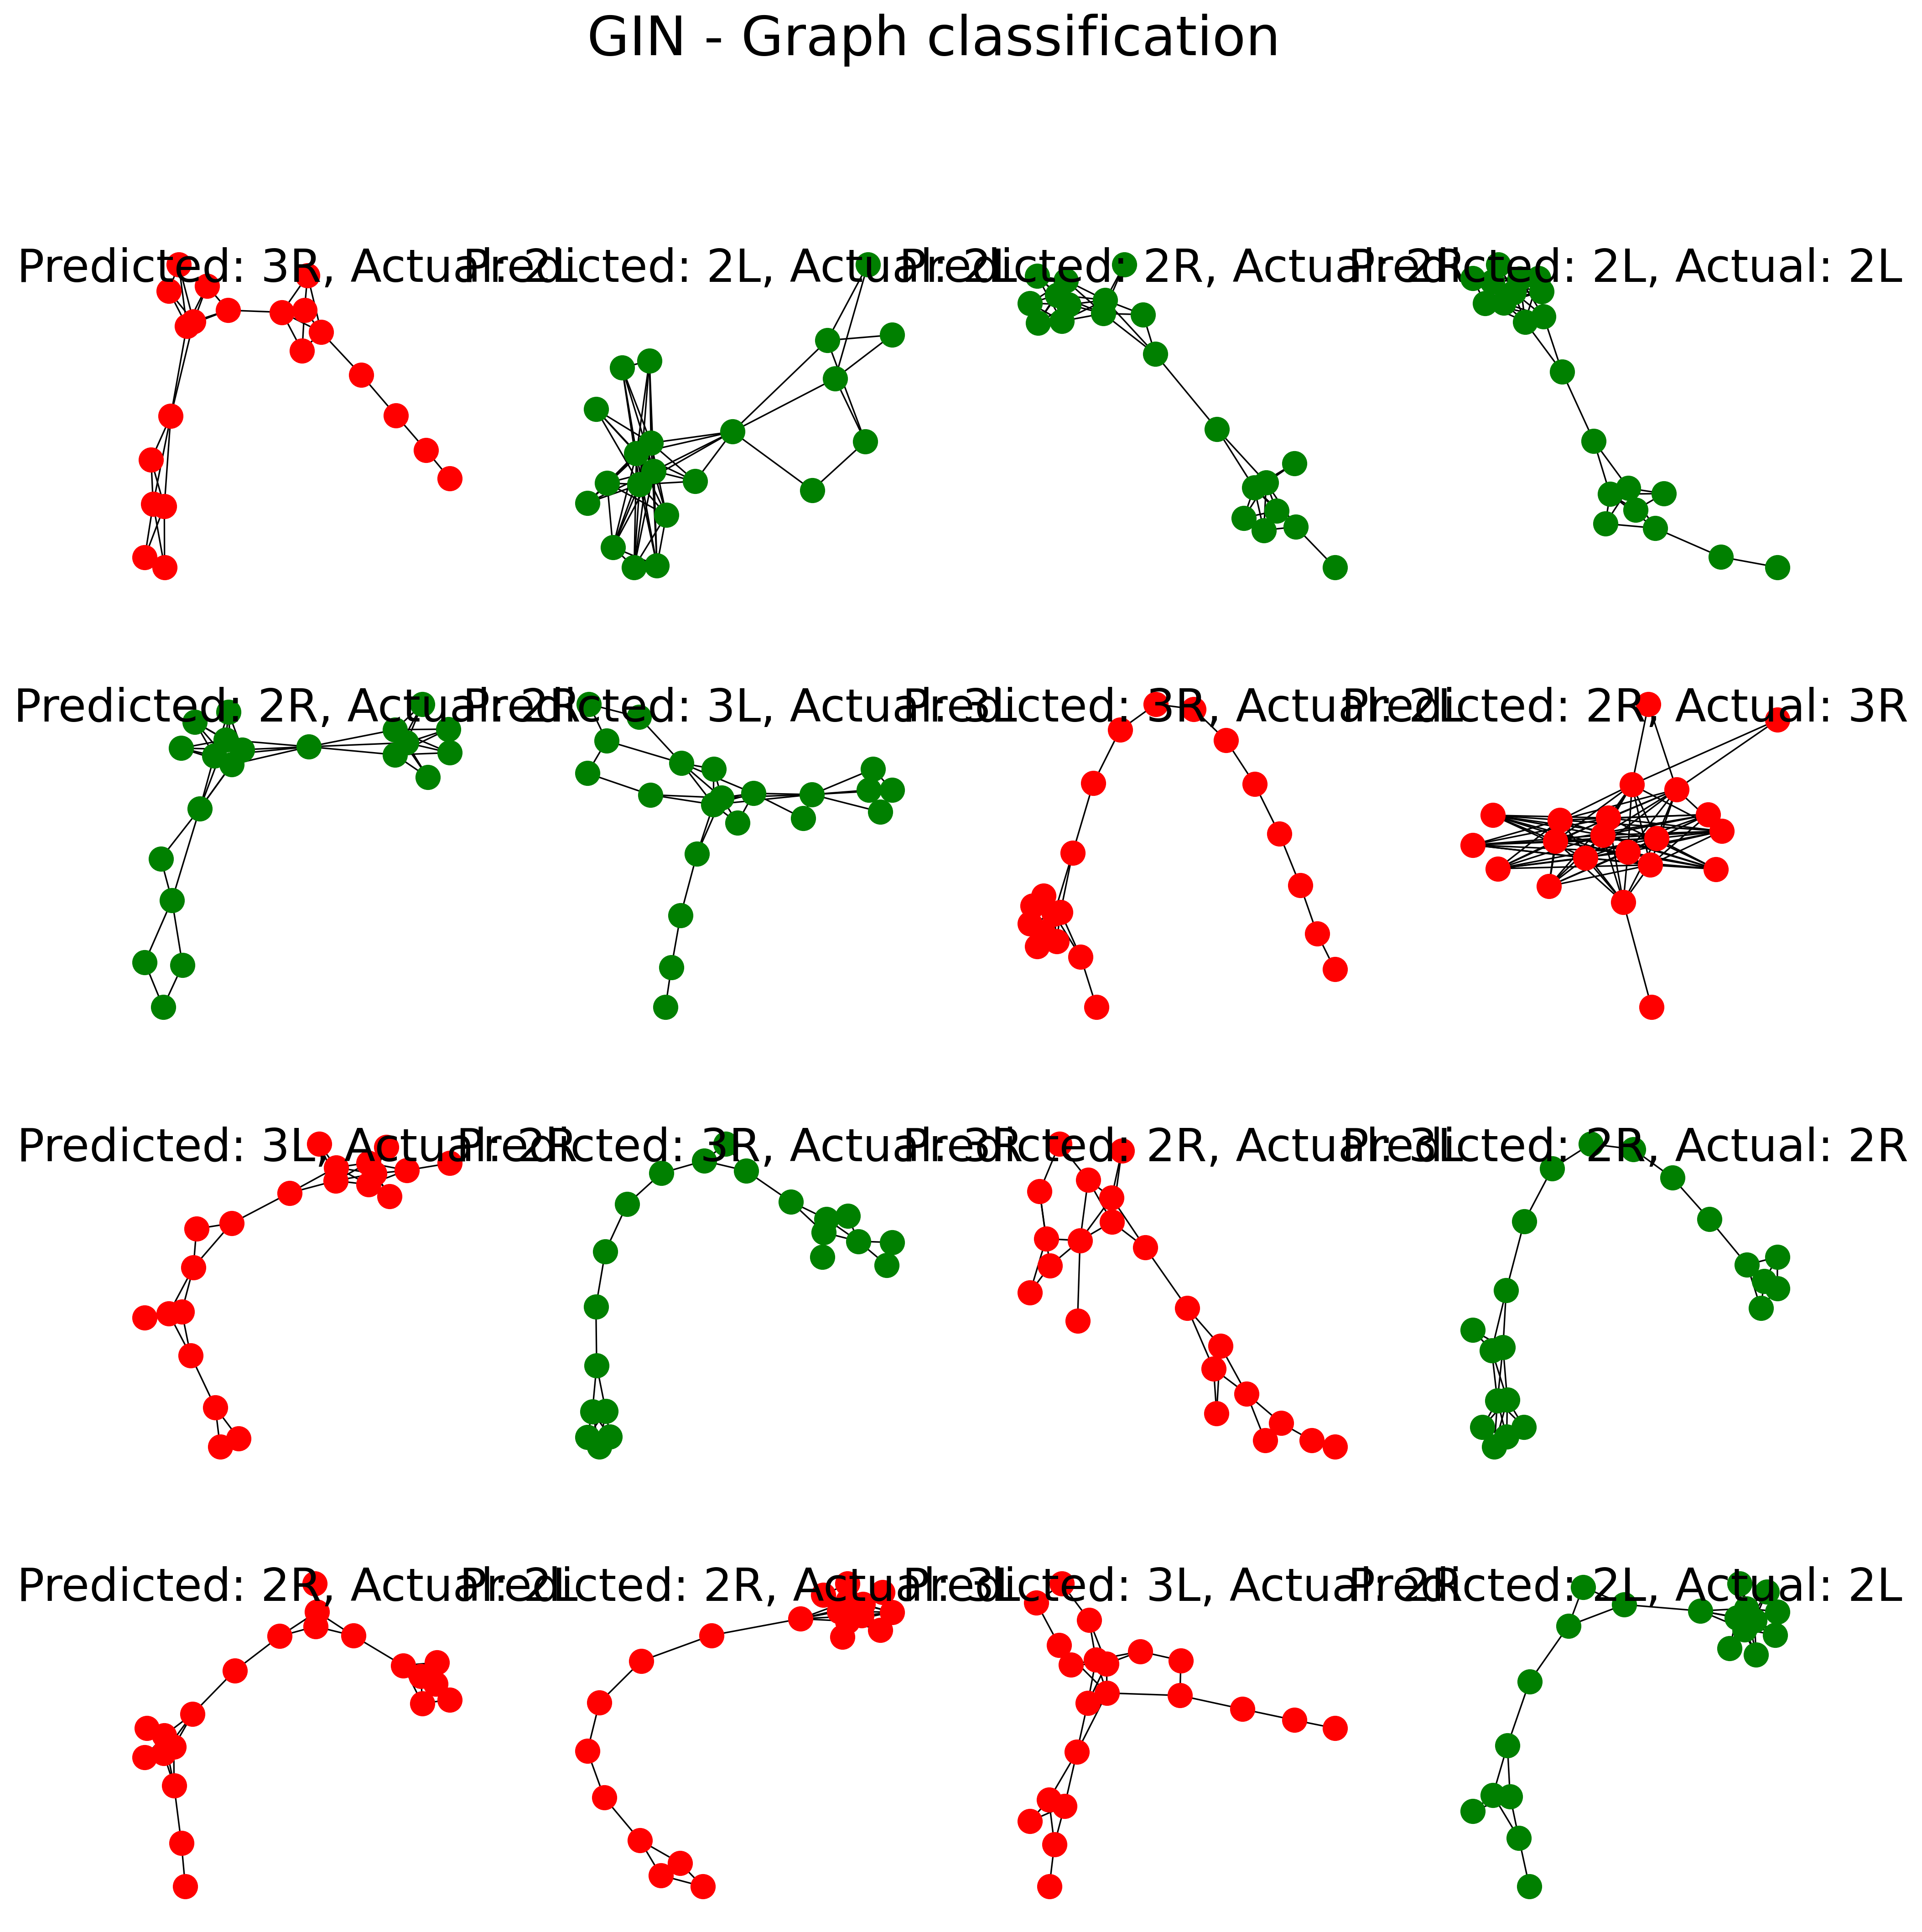

In [22]:

label_mapping = {0: '2L', 1: '2R', 2: '3L', 3: '3R'}


import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx


fig, ax = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle('GIN - Graph classification')

for i, data in enumerate(dataset[1113-16:]):
    _, out = gin(data.x, data.edge_index, data.batch)
    predicted_class = out.argmax(dim=1).item()
    actual_class = data.y.item()
    color = "green" if predicted_class == actual_class else "red"

    ix = np.unravel_index(i, ax.shape)
    ax[ix].axis('off')
    G = to_networkx(dataset[1113-16+i], to_undirected=True)
    nx.draw_networkx(G,
                     pos=nx.spring_layout(G, seed=0),
                     with_labels=False,
                     node_size=150,
                     node_color=color,
                     width=0.8,
                     ax=ax[ix])

    classification_text = f"Predicted: {label_mapping[predicted_class]}, Actual: {label_mapping[actual_class]}"
    ax[ix].text(0.5, 0.9, classification_text, horizontalalignment='center', verticalalignment='center', transform=ax[ix].transAxes, color='black')

plt.show()
